Entrega : 01

Grupo : 07

# Load

In [2]:
##Instalamos las librerias
import pandas as pd
import numpy as np
import os
from pathlib import Path 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer

# pre processing categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Ruta Maria
#path_proyecto ='/content/drive/MyDrive/Machine Learning_Entregables/Entregable 1/data_inter' #### Ruta a cambiar

# os.chdir(path_proyecto)
# os.getcwd()

In [5]:
# Ruta Eliane
# path_proyecto ='/content/drive/MyDrive/2026/2026-0/Machine learning/data_inter' #### Ruta a cambiar

# os.chdir(path_proyecto)
# os.getcwd()

In [6]:
# Obtener directorio base (Grupo07) - subir un nivel desde scripts
BASE_DIR = Path(__file__).parent.parent if '__file__' in dir() else Path.cwd().parent

# Si estamos en scripts, subir un nivel; si no, usar cwd
if "scripts" in str(Path.cwd()):
    BASE_DIR = Path.cwd().parent
else:
    BASE_DIR = Path.cwd()

print(f"BASE_DIR: {BASE_DIR}")

# Rutas para datos
DATA_DIR = BASE_DIR / "data"
RAW_DATA_PATH = DATA_DIR / "raw"
INTER_DATA_PATH = DATA_DIR / "inter"
FINAL_DATA_PATH = DATA_DIR / "final"
# Rutas para gráficos, scripts y documentación
GRAPHS_PATH = BASE_DIR / "graphs"
SCRIPTS_PATH = BASE_DIR / "scripts"
DOCS_PATH = BASE_DIR / "docs"

print(f"RAW_DATA_PATH: {RAW_DATA_PATH}")
print(f"Existe: {RAW_DATA_PATH.exists()}")

BASE_DIR: c:\Users\leydi\Documents\Machine-Learning-para-Finanzas_2026_0\Grupo07
RAW_DATA_PATH: c:\Users\leydi\Documents\Machine-Learning-para-Finanzas_2026_0\Grupo07\data\raw
Existe: True


In [7]:
# cargando datos
df_lending_raw = pd.read_excel(RAW_DATA_PATH / "lending_dataset.xlsx")
df_lending_raw = df_lending_raw.drop(columns=["index"])

In [8]:
df_lending_raw.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'revol_util', 'application_type',
       'pub_rec_bankruptcies'],
      dtype='object')

In [9]:
df_lending_raw

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,revol_util,application_type,pub_rec_bankruptcies
0,2400,36,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,s,small_business,IL,8.72,0.0,98.5,Individual,0.0
1,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,s,other,CA,20.00,0.0,21.0,Individual,0.0
2,3000,36,18.64,109.43,E,MKC Accounting,9 years,RENT,48000.0,Source Verified,Fully Paid,s,car,CA,5.35,0.0,87.5,Individual,0.0
3,5600,60,21.28,152.39,F,NaN,4 years,OWN,40000.0,Source Verified,Charged Off,s,small_business,CA,5.55,0.0,32.6,Individual,0.0
4,5375,60,12.69,121.45,B,Starbucks,< 1 year,RENT,15000.0,Verified,Charged Off,s,other,TX,18.08,0.0,36.5,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19903,5000,36,9.01,159.03,B,Ping Interactive,1 year,MORTGAGE,250000.0,Not Verified,Fully Paid,s,other,NY,10.00,2.0,36.6,Individual,NaN
19904,3500,36,9.96,112.87,B,UNIQUE ID WEB DESIGN,< 1 year,RENT,13500.0,Not Verified,Fully Paid,s,educational,FL,16.44,0.0,41.1,Individual,NaN
19905,25000,36,10.59,813.65,C,Institute for Mind/Body Research and Education,2 years,RENT,48000.0,Not Verified,Fully Paid,s,small_business,NY,4.05,0.0,23.3,Individual,NaN
19906,3000,36,10.28,97.20,C,Oracle,2 years,MORTGAGE,200000.0,Not Verified,Fully Paid,s,home_improvement,NY,0.00,1.0,0.0,Individual,NaN


# EDA

Análisis inicial

In [10]:
print(df_lending_raw.shape)

(19908, 19)


In [11]:
df_lending_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             19908 non-null  int64  
 1   term                  19908 non-null  int64  
 2   int_rate              19908 non-null  float64
 3   installment           19908 non-null  float64
 4   grade                 19908 non-null  object 
 5   emp_title             18723 non-null  object 
 6   emp_length            19406 non-null  object 
 7   home_ownership        19905 non-null  object 
 8   annual_inc            19905 non-null  float64
 9   verification_status   19905 non-null  object 
 10  loan_status           19905 non-null  object 
 11  pymnt_plan            19908 non-null  object 
 12  purpose               19905 non-null  object 
 13  addr_state            19899 non-null  object 
 14  dti                   19897 non-null  float64
 15  delinq_2yrs        

In [12]:
TARGET_CLAS = "loan_status"  # variable objetivo para clasificación

# selecciona las columnas numéricas y categóricas excepto la variable objetivo

df_clas = df_lending_raw.copy()
num_clas = df_clas.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_clas = df_clas.select_dtypes(include=['object', "category", "bool"]).columns.tolist()
cat_clas.remove(TARGET_CLAS)

print("=== Variables Identificadas ===")
print("Target de clasificación:", TARGET_CLAS)
print("Variables numéricas para clasificación:", num_clas)
print("Variables categóricas para clasificación:", cat_clas)
print("--------------------------------")

=== Variables Identificadas ===
Target de clasificación: loan_status
Variables numéricas para clasificación: ['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'pub_rec_bankruptcies']
Variables categóricas para clasificación: ['grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'application_type']
--------------------------------


### 1. Análisis estadístico inicial

In [13]:
def eda_numericas_descriptivas(df, num_cols, top_n=5):
    """
    Realiza EDA descriptivo para variables numéricas.

    Args:
        df: DataFrame a analizar
        num_cols: Lista de columnas numéricas
        top_n: Número de valores más frecuentes a mostrar
    """
    print("=" * 50)
    print("ESTADÍSTICAS DESCRIPTIVAS")
    print("=" * 50)
    display(df[num_cols].describe().T.round(2))

    print("\n" + "=" * 50)
    print("QUANTILES (1%, 25%, 50%, 75%, 99%)")
    print("=" * 50)
    display(df[num_cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99]).T.round(2))

    print("\n" + "=" * 50)
    print("VALORES NULOS")
    print("=" * 50)
    print(df[num_cols].isna().sum())

    print("\n" + "=" * 50)
    print(f"TOP {top_n} VALORES MÁS FRECUENTES POR VARIABLE")
    print("=" * 50)
    for col in num_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts().head(top_n).round(2))

In [14]:
# clasificación
eda_numericas_descriptivas(df_clas, num_clas)

ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
loan_amnt,19908.0,11353.85,7463.70,500.00,5750.00,10000.00,15000.00,35000.00
term,19908.0,42.10,10.45,36.00,36.00,36.00,60.00,60.00
int_rate,19908.0,12.09,3.70,5.42,9.45,11.86,14.61,24.40
installment,19908.0,330.61,210.56,15.69,171.29,285.78,440.82,1302.69
annual_inc,19905.0,71074.71,69810.72,4000.00,42000.00,60000.00,85000.00,6000000.00
dti,19897.0,13.01,6.66,0.00,7.84,13.08,18.20,29.99
delinq_2yrs,19899.0,0.14,0.49,0.00,0.00,0.00,0.00,11.00
revol_util,19880.0,49.74,49.82,0.00,26.50,50.30,72.80,5829.00
pub_rec_bankruptcies,19587.0,0.04,0.19,0.00,0.00,0.00,0.00,2.00



QUANTILES (1%, 25%, 50%, 75%, 99%)


,0.01,0.25,0.50,0.75,0.99
loan_amnt,1200.00,5750.00,10000.00,15000.00,35000.00
term,36.00,36.00,36.00,60.00,60.00
int_rate,5.42,9.45,11.86,14.61,20.99
installment,39.14,171.29,285.78,440.82,933.13
annual_inc,14400.00,42000.00,60000.00,85000.00,248003.84
dti,0.35,7.84,13.08,18.20,26.26
delinq_2yrs,0.00,0.00,0.00,0.00,2.00
revol_util,0.00,26.50,50.30,72.80,98.50
pub_rec_bankruptcies,0.00,0.00,0.00,0.00,1.00



VALORES NULOS
loan_amnt                 0
term                      0
int_rate                  0
installment               0
annual_inc                3
dti                      11
delinq_2yrs               9
revol_util               28
pub_rec_bankruptcies    321
dtype: int64

TOP 5 VALORES MÁS FRECUENTES POR VARIABLE

--- loan_amnt ---
loan_amnt
10000    1466
12000    1208
5000     1026
6000      994
15000     984
Name: count, dtype: int64

--- term ---
term
36    14852
60     5056
Name: count, dtype: int64

--- int_rate ---
int_rate
10.99    492
11.49    407
13.49    406
7.51     384
7.88     381
Name: count, dtype: int64

--- installment ---
installment
311.11    37
180.96    37
368.45    33
311.02    30
325.74    28
Name: count, dtype: int64

--- annual_inc ---
annual_inc
60000.0    794
50000.0    554
40000.0    445
45000.0    431
75000.0    425
Name: count, dtype: int64

--- dti ---
dti
0.00     84
14.29    25
12.48    23
6.00     23
12.00    22
Name: count, dtype: int64

--- d

### 1.2) Categóricas - frecuencias

In [15]:
def eda_categoricas_descriptivas(df, cat_cols, top_n=10):
    """
    Realiza EDA descriptivo para variables categóricas.

    Args:
        df: DataFrame a analizar
        cat_cols: Lista de columnas categóricas
        top_n: Número de categorías más frecuentes a mostrar
    """
    print("=" * 50)
    print("VALORES ÚNICOS POR VARIABLE")
    print("=" * 50)
    display(df[cat_cols].nunique().to_frame("n_unique"))

    print("\n" + "=" * 50)
    print("VALORES NULOS")
    print("=" * 50)
    print(df[cat_cols].isna().sum())

    print("\n" + "=" * 50)
    print(f"TOP {top_n} FRECUENCIAS POR VARIABLE")
    print("=" * 50)
    for col in cat_cols:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False).head(top_n))

In [16]:
# clasificación
eda_categoricas_descriptivas(df_clas, cat_clas)

VALORES ÚNICOS POR VARIABLE


,n_unique
grade,7
emp_title,15047
emp_length,11
home_ownership,5
verification_status,3
pymnt_plan,1
purpose,14
addr_state,8
application_type,2



VALORES NULOS
grade                     0
emp_title              1185
emp_length              502
home_ownership            3
verification_status       3
pymnt_plan                0
purpose                   3
addr_state                9
application_type          0
dtype: int64

TOP 10 FRECUENCIAS POR VARIABLE

--- grade ---
grade
B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: count, dtype: int64

--- emp_title ---
emp_title
NaN                    1185
Bank of America          53
Kaiser Permanente        50
State of California      42
US Army                  40
AT&T                     36
JP Morgan Chase          27
IBM                      25
Verizon                  24
UPS                      23
Name: count, dtype: int64

--- emp_length ---
emp_length
10+ years    4249
< 1 year     2304
2 years      2218
3 years      2108
4 years      1871
5 years      1649
1 year       1636
6 years      1151
7 years       867
8 years       718
Name: count, dtype: int6

## 2. Análisis de calidad (diagnóstico)

### 2.1) Numéricas

In [17]:
def eda_calidad_numericas(df, num_cols, nombre_dataset="Dataset"):
    """
    Realiza análisis de calidad (diagnóstico) para variables numéricas.

    Args:
        df: DataFrame a analizar
        num_cols: Lista de columnas numéricas
        nombre_dataset: Nombre del dataset para identificación
    """
    print("=" * 50)
    print(f"ANÁLISIS DE CALIDAD - {nombre_dataset}")
    print("=" * 50)

    print("\nVariables numéricas analizadas:")
    print(num_cols)

    # 1) Información general
    print("\n" + "=" * 50)
    print("INFORMACIÓN GENERAL (dtypes, nulos)")
    print("=" * 50)
    df[num_cols].info()

    # 2) Diagnóstico de dtypes incorrectos
    print("\n" + "=" * 50)
    print("DIAGNÓSTICO DE DTYPES INCORRECTOS")
    print("=" * 50)

    dtype_rows = []
    for col in num_cols:
        serie_original = df[col]
        serie_coerce = pd.to_numeric(serie_original, errors="coerce")

        dtype_rows.append({
            "variable": col,
            "dtype_original": serie_original.dtype,
            "NaN_antes": serie_original.isna().sum(),
            "NaN_despues_coerce": serie_coerce.isna().sum(),
            "valores_no_numericos": serie_coerce.isna().sum() - serie_original.isna().sum()
        })

    dtype_diag = pd.DataFrame(dtype_rows)
    display(dtype_diag)

    # 3) Análisis de missings redondeado a 2 decimales

    print("\n" + "=" * 50)
    print("ANÁLISIS DE MISSINGS")
    print("=" * 50)

    missing_num = (
        df[num_cols]
        .isna()
        .mean()
        .round(2)
        .sort_values(ascending=False)
        .to_frame("pct_missing")
    )
    display(missing_num)

    # 4) Análisis de outliers
    print("\n" + "=" * 50)
    print("ANÁLISIS DE OUTLIERS")
    print("=" * 50)

    quantiles_num = df[num_cols].quantile([0.01, 0.50, 0.99]).T
    quantiles_num.columns = ["p1", "p50", "p99"]

    min_max_num = df[num_cols].agg(["min", "max"]).T

    outliers_num = pd.concat([min_max_num, quantiles_num], axis=1)
    outliers_num = outliers_num[["min", "p1", "p50", "p99", "max"]]
    display(outliers_num)

    # 5) Análisis de duplicados
    print("\n" + "=" * 50)
    print("ANÁLISIS DE DUPLICADOS")
    print("=" * 50)

    n_duplicados = df.duplicated().sum()
    print(f"Número de filas duplicadas: {n_duplicados}")

In [18]:
eda_calidad_numericas(df_clas, num_clas, "Dataset dde Clasificación")

ANÁLISIS DE CALIDAD - Dataset dde Clasificación

Variables numéricas analizadas:
['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'pub_rec_bankruptcies']

INFORMACIÓN GENERAL (dtypes, nulos)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             19908 non-null  int64  
 1   term                  19908 non-null  int64  
 2   int_rate              19908 non-null  float64
 3   installment           19908 non-null  float64
 4   annual_inc            19905 non-null  float64
 5   dti                   19897 non-null  float64
 6   delinq_2yrs           19899 non-null  float64
 7   revol_util            19880 non-null  float64
 8   pub_rec_bankruptcies  19587 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB

DIAGNÓSTICO DE DTYPES INCORRECTOS


,variable,dtype_original,NaN_antes,NaN_despues_coerce,valores_no_numericos
0,loan_amnt,int64,0,0,0
1,term,int64,0,0,0
2,int_rate,float64,0,0,0
3,installment,float64,0,0,0
4,annual_inc,float64,3,3,0
5,dti,float64,11,11,0
6,delinq_2yrs,float64,9,9,0
7,revol_util,float64,28,28,0
8,pub_rec_bankruptcies,float64,321,321,0



ANÁLISIS DE MISSINGS


,pct_missing
pub_rec_bankruptcies,0.02
loan_amnt,0.00
term,0.00
installment,0.00
int_rate,0.00
annual_inc,0.00
dti,0.00
delinq_2yrs,0.00
revol_util,0.00



ANÁLISIS DE OUTLIERS


,min,p1,p50,p99,max
loan_amnt,500.00,1200.0000,10000.00,35000.0000,35000.00
term,36.00,36.0000,36.00,60.0000,60.00
int_rate,5.42,5.4200,11.86,20.9900,24.40
installment,15.69,39.1449,285.78,933.1337,1302.69
annual_inc,4000.00,14400.0000,60000.00,248003.8400,6000000.00
dti,0.00,0.3500,13.08,26.2600,29.99
delinq_2yrs,0.00,0.0000,0.00,2.0000,11.00
revol_util,0.00,0.0000,50.30,98.5000,5829.00
pub_rec_bankruptcies,0.00,0.0000,0.00,1.0000,2.00



ANÁLISIS DE DUPLICADOS
Número de filas duplicadas: 0


### 2.2) Categóricas

In [19]:
def eda_calidad_categoricas(df, cat_cols, nombre_dataset="Dataset", umbral_low_freq=0.01):
    """
    Realiza análisis de calidad (diagnóstico) para variables categóricas.

    Args:
        df: DataFrame a analizar
        cat_cols: Lista de columnas categóricas
        nombre_dataset: Nombre del dataset para identificación
        umbral_low_freq: Umbral para detectar categorías con baja frecuencia (default 1%)
    """
    print("=" * 50)
    print(f"ANÁLISIS DE CALIDAD CATEGÓRICAS - {nombre_dataset}")
    print("=" * 50)

    print("\nVariables categóricas analizadas:")
    print(cat_cols)

    # 1) Análisis de missings
    print("\n" + "=" * 50)
    print("ANÁLISIS DE MISSINGS")
    print("=" * 50)

    missing_cat = (
        df[cat_cols]
        .isna()
        .mean()
        .round(2)
        .sort_values(ascending=False)
        .to_frame("pct_missing")
    )
    display(missing_cat)

    # 2) Análisis de missings codificados
    print("\n" + "=" * 50)
    print("MISSINGS CODIFICADOS (vacíos, '?')")
    print("=" * 50)

    rows_missing_cod = []
    for col in cat_cols:
        conteo_vacio = (df[col].astype(str).str.strip() == "").sum()
        conteo_preg = (df[col].astype(str).str.strip() == "?").sum()

        rows_missing_cod.append({
            "variable": col,
            "empty_string": conteo_vacio,
            "question_mark": conteo_preg
        })

    missing_cod = pd.DataFrame(rows_missing_cod)
    display(missing_cod)

    # 3) Categorías con baja frecuencia
    print("\n" + "=" * 50)
    print(f"CATEGORÍAS CON FRECUENCIA < {umbral_low_freq*100:.0f}%")
    print("=" * 50)

    rows_low_freq = []
    for col in cat_cols:
        freq = df[col].value_counts(normalize=True)
        low_freq = freq[freq < umbral_low_freq]

        for categoria, propor in low_freq.items():
            rows_low_freq.append({
                "variable": col,
                "categoria": categoria,
                "frecuencia_relativa": round(propor, 4)
            })

    low_freq_df = pd.DataFrame(rows_low_freq)

    if low_freq_df.empty:
        print("No se identificaron categorías con baja frecuencia.")
    else:
        display(low_freq_df)

In [20]:
# clasificación
eda_calidad_categoricas(df_clas, cat_clas, "Dataset de Clasificación")

ANÁLISIS DE CALIDAD CATEGÓRICAS - Dataset de Clasificación

Variables categóricas analizadas:
['grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'application_type']

ANÁLISIS DE MISSINGS


,pct_missing
emp_title,0.06
emp_length,0.03
grade,0.00
home_ownership,0.00
verification_status,0.00
pymnt_plan,0.00
purpose,0.00
addr_state,0.00
application_type,0.00



MISSINGS CODIFICADOS (vacíos, '?')


,variable,empty_string,question_mark
0,grade,0,0
1,emp_title,0,0
2,emp_length,0,0
3,home_ownership,0,0
4,verification_status,0,0
5,pymnt_plan,0,0
6,purpose,0,0
7,addr_state,0,0
8,application_type,0,0



CATEGORÍAS CON FRECUENCIA < 1%


,variable,categoria,frecuencia_relativa
0,grade,G,0.0080
1,emp_title,Bank of America,0.0028
2,emp_title,Kaiser Permanente,0.0027
3,emp_title,State of California,0.0022
4,emp_title,US Army,0.0021
...,...,...,...
15052,purpose,educational,0.0081
15053,purpose,renewable_energy,0.0026
15054,addr_state,951xx,0.0001
15055,addr_state,106xx,0.0001


## 3) Preprocesamiento

In [21]:
# df_lending_inter = pd.read_csv("lending_inter.csv")
# df_lending_inter = df_lending_inter.drop(columns=["index"])

#### 3.1) Numéricas

In [22]:
df_clas_inter = df_clas.copy()

In [23]:
def imputar_missings_numericas(df, num_cols, estrategia="median"):
    """
    Imputa missings en variables numéricas.

    Args:
        df: DataFrame a procesar
        num_cols: Lista de columnas numéricas
        estrategia: Estrategia de imputación ("mean", "median", "zero")

    Returns:
        DataFrame con resumen de imputación
    """
    resumen = []

    for col in num_cols:
        n_missing = df[col].isna().sum()
        pct_missing = df[col].isna().mean() * 100

        if estrategia == "mean":
            valor_imputar = df[col].mean()
        elif estrategia == "median":
            valor_imputar = df[col].median()
        elif estrategia == "zero":
            valor_imputar = 0
        else:
            raise ValueError("Estrategia no reconocida. Use 'mean', 'median' o 'zero'.")

        df[col].fillna(valor_imputar, inplace=True)

        resumen.append({
            "variable": col,
            "n_missings_imputados": n_missing,
            "pct_missings_imputados": round(pct_missing, 2),
            "valor_imputado": round(valor_imputar, 4)
        })

    resumen_df = pd.DataFrame(resumen)

    print(f"Estrategia usada: {estrategia}")

    return resumen_df

In [24]:
imputar_missings_numericas(df_clas_inter, num_clas, estrategia="median")

Estrategia usada: median


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\3772865827.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(valor_imputar, inplace=True)


,variable,n_missings_imputados,pct_missings_imputados,valor_imputado
0,loan_amnt,0,0.00,10000.00
1,term,0,0.00,36.00
2,int_rate,0,0.00,11.86
3,installment,0,0.00,285.78
4,annual_inc,3,0.02,60000.00
5,dti,11,0.06,13.08
6,delinq_2yrs,9,0.05,0.00
7,revol_util,28,0.14,50.30
8,pub_rec_bankruptcies,321,1.61,0.00


In [25]:
def transformar_log(df, cols):
    """
    Aplica transformación log(1+x) para reducir sesgo/colas.
    Usa FunctionTransformer de sklearn.

    Args:
        df: DataFrame a procesar
        cols: Nombre de columna (str) o lista de columnas a transformar
    """
    # Convertir a lista si es string
    if isinstance(cols, str):
        cols = [cols]

    log_transformer = FunctionTransformer(np.log1p, validate=True)

    print("Columnas transformadas (log):")
    for col in cols:
        sesgo_antes = df[col].skew()
        df[col] = log_transformer.transform(df[[col]]).flatten()
        sesgo_despues = df[col].skew()

        print(f"  {col}: sesgo {sesgo_antes:.4f} -> {sesgo_despues:.4f}")

Skew (sesgo) es una medida de asimetría de la distribución de datos:

- Skew = 0: distribución simétrica
- Skew > 0: cola derecha más larga (sesgo positivo)
- Skew < 0: cola izquierda más larga (sesgo negativo)

In [26]:
# dataset clasificación
# columnas: - loan_amnt - annual_inc
transformar_log(df_clas_inter, ["loan_amnt", "annual_inc"])

Columnas transformadas (log):
  loan_amnt: sesgo 1.0535 -> -0.4849
  annual_inc: sesgo 35.9127 -> 0.1411


c:\Users\leydi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
c:\Users\leydi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### 3.2) Categóricas

In [27]:
def limpiar_strip_categoricas(df, cat_cols):
    """
    Aplica strip() para unificar categorías (elimina espacios).

    Args:
        df: DataFrame a procesar
        cat_cols: Lista de columnas categóricas
    """
    print("Limpieza strip - Unificar categorías:")
    for col in cat_cols:
        nunique_antes = df[col].nunique()
        df[col] = df[col].astype(str).str.strip()
        nunique_despues = df[col].nunique()

        print(f"  {col}: nunique {nunique_antes} -> {nunique_despues}")

In [28]:
def reemplazar_interrogacion_nan(df, cat_cols):
    """
    Reemplaza '?' por NaN (missing codificado).

    Args:
        df: DataFrame a procesar
        cat_cols: Lista de columnas categóricas
    """
    print("Reemplazo '?' -> NaN:")
    for col in cat_cols:
        conteo_antes = (df[col].astype(str).str.strip() == "?").sum()
        df[col] = df[col].replace("?", np.nan)

        print(f"  {col}: {conteo_antes} '?' reemplazados")

In [29]:
def imputar_missing_categoricas(df, cat_cols, valor="Missing"):
    """
    Imputa missings en categóricas con valor constante.
    Usa SimpleImputer(strategy='constant').

    Args:
        df: DataFrame a procesar
        cat_cols: Lista de columnas categóricas
        valor: Valor para imputar (default "Missing")
    """
    imputer = SimpleImputer(strategy="constant", fill_value=valor)

    print(f"Imputación con '{valor}':")
    for col in cat_cols:
        missing_antes = df[col].isna().sum()
        df[col] = imputer.fit_transform(df[[col]]).flatten()
        missing_despues = df[col].isna().sum()

        print(f"  {col}: missing {missing_antes} -> {missing_despues}")

In [30]:
# clasificación - limpieza y reemplazo
limpiar_strip_categoricas(df_clas_inter, cat_clas)
reemplazar_interrogacion_nan(df_clas_inter, cat_clas)
imputar_missing_categoricas(df_clas_inter, cat_clas)

Limpieza strip - Unificar categorías:
  grade: nunique 7 -> 7
  emp_title: nunique 15047 -> 14934
  emp_length: nunique 11 -> 12
  home_ownership: nunique 5 -> 6
  verification_status: nunique 3 -> 4
  pymnt_plan: nunique 1 -> 1
  purpose: nunique 14 -> 15
  addr_state: nunique 8 -> 9
  application_type: nunique 2 -> 2
Reemplazo '?' -> NaN:
  grade: 0 '?' reemplazados
  emp_title: 0 '?' reemplazados
  emp_length: 0 '?' reemplazados
  home_ownership: 0 '?' reemplazados
  verification_status: 0 '?' reemplazados
  pymnt_plan: 0 '?' reemplazados
  purpose: 0 '?' reemplazados
  addr_state: 0 '?' reemplazados
  application_type: 0 '?' reemplazados
Imputación con 'Missing':
  grade: missing 0 -> 0
  emp_title: missing 0 -> 0
  emp_length: missing 0 -> 0
  home_ownership: missing 0 -> 0
  verification_status: missing 0 -> 0
  pymnt_plan: missing 0 -> 0
  purpose: missing 0 -> 0
  addr_state: missing 0 -> 0
  application_type: missing 0 -> 0


**Nota:** LabelEncoder y OneHotEncoder se aplicarán solo a variables con pocas categorías en etapas posteriores del modelado.

## 4) Análisis Exploratorio (EDA univariado) y Visualización

### 4.1) Numéricas: descriptivo y visualización

In [31]:
def eda_univariado_numericas(df, num_cols, nombre_dataset="Dataset"):
    print("\n====================================")
    print(f"Dataset: {nombre_dataset}")
    print("4.1) EDA UNIVARIADO — VARIABLES NUMÉRICAS")
    print("====================================")

    print("\nVariables numéricas analizadas:")
    print(num_cols)

     # -------------------------
    # Parámetros visuales automáticos
    # -------------------------
    n_vars = len(num_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)

    # -------------------------
    # Histogramas
    # -------------------------
    print("\n--- Histogramas ---")
    plt.figure(figsize=(5*n_cols, 3.5*n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Histograma de {col}", fontsize=11)
        plt.xlabel("")
        plt.ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

    # -------------------------
    # Boxplots
    # -------------------------
    print("\n--- Boxplots ---")
    plt.figure(figsize=(5*n_cols, 2.8*n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot de {col}", fontsize=11)
        plt.xlabel("")

    plt.tight_layout()
    plt.show()

    # -------------------------
   # Scatterplots (valor vs orden de observación)
   # -------------------------
    print("\n--- Scatterplots según orden de observación ---")
    plt.figure(figsize=(5 * n_cols, 3.5 * n_rows))

    for i, col in enumerate(num_cols, 1):
      plt.subplot(n_rows, n_cols, i)

      sns.scatterplot(
          x=range(len(df)),
          y=df[col],
          alpha=0.5
      )

      plt.title(f"Dispersión de {col}", fontsize=11)
      plt.xlabel("Orden de observación")
      plt.ylabel(col)

    plt.tight_layout()
    plt.show()



    # -------------------------
    # Barplots para variables discretas
    # -------------------------
    print("\n--- Barplots (variables discretas) ---")
    discretas = [col for col in num_cols if df[col].nunique() <= 15]

    if discretas:
        n_vars_d = len(discretas)
        n_cols_d = min(n_cols, n_vars_d)
        n_rows_d = math.ceil(n_vars_d / n_cols_d)

        plt.figure(figsize=(5*n_cols_d, 3.5*n_rows_d))

        for i, col in enumerate(discretas, 1):
            plt.subplot(n_rows_d, n_cols_d, i)
            counts = df[col].value_counts().sort_index()
            sns.barplot(x=counts.index.astype(str), y=counts.values)
            plt.title(f"Barplot de {col}", fontsize=11)
            plt.xlabel("")
            plt.ylabel("Frecuencia")

        plt.tight_layout()
        plt.show()
    else:
        print("No se identificaron variables numéricas discretas.")


Dataset: Dataset de Clasificación
4.1) EDA UNIVARIADO — VARIABLES NUMÉRICAS

Variables numéricas analizadas:
['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'pub_rec_bankruptcies']

--- Histogramas ---


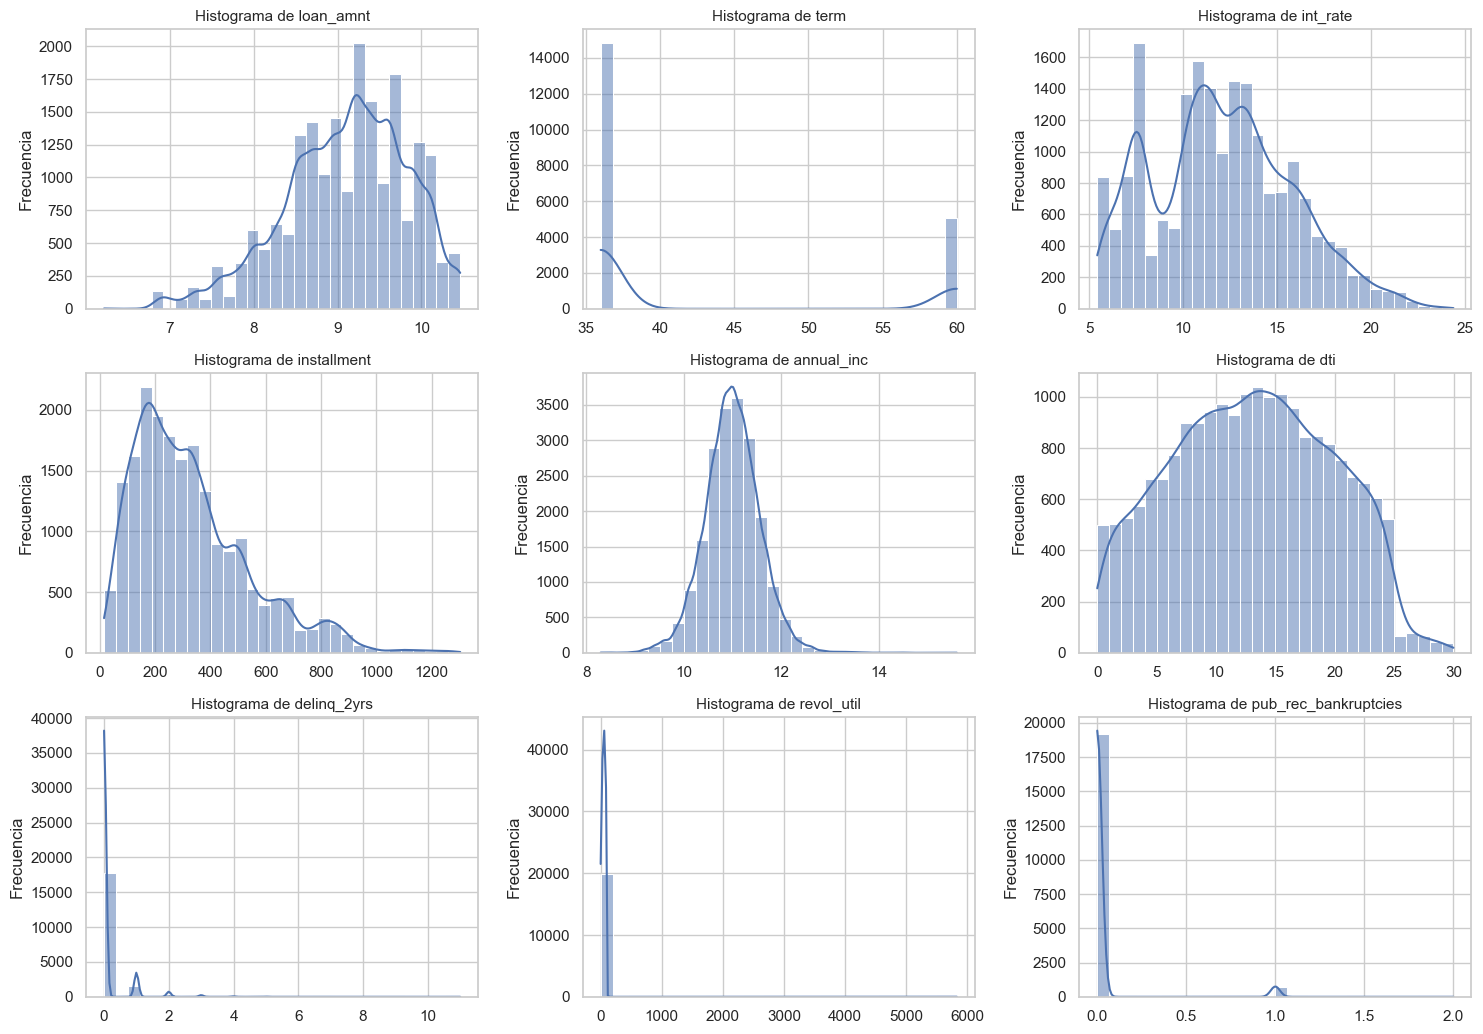


--- Boxplots ---


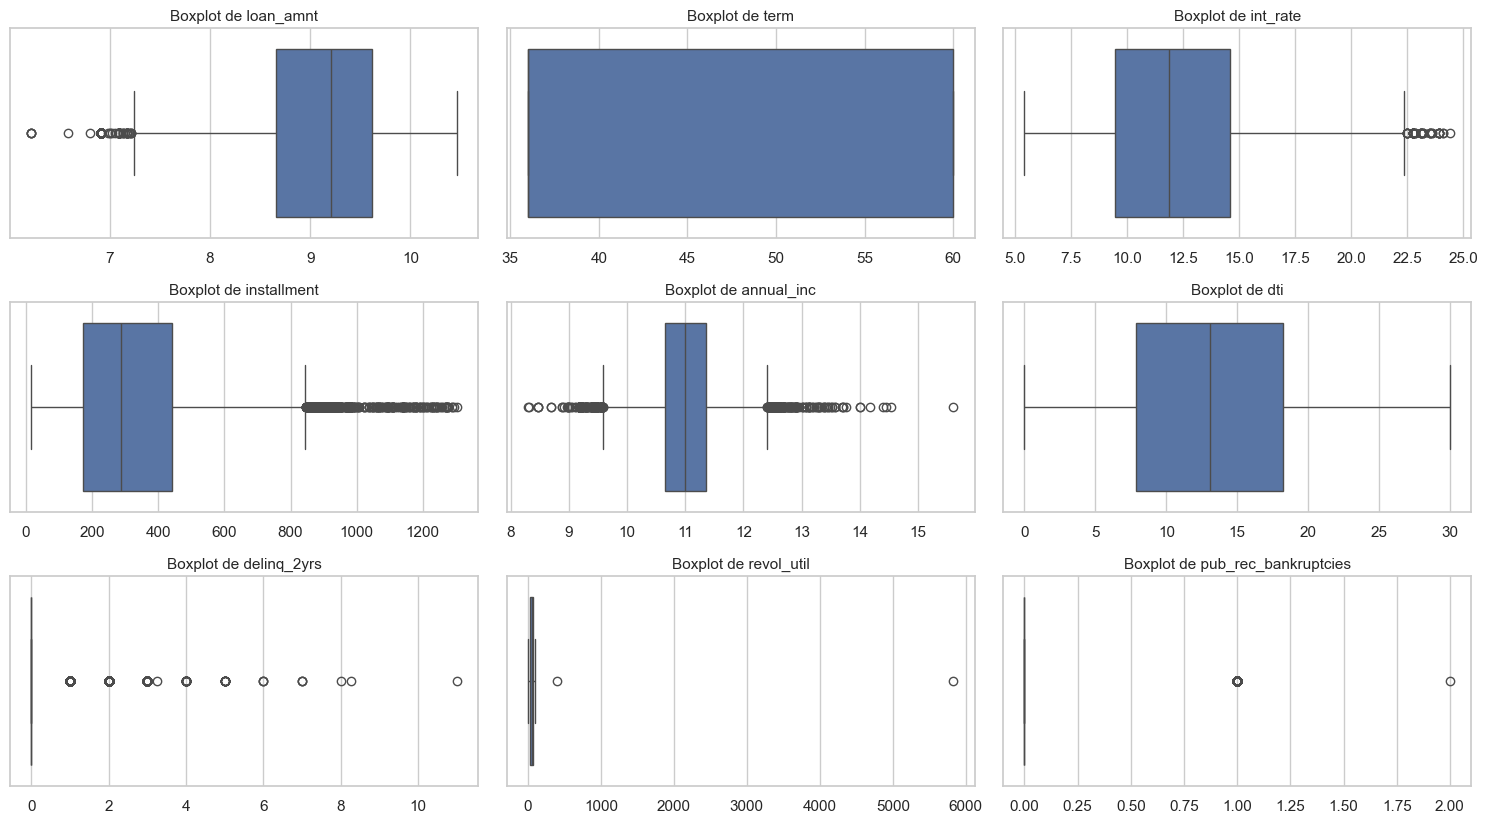


--- Scatterplots según orden de observación ---


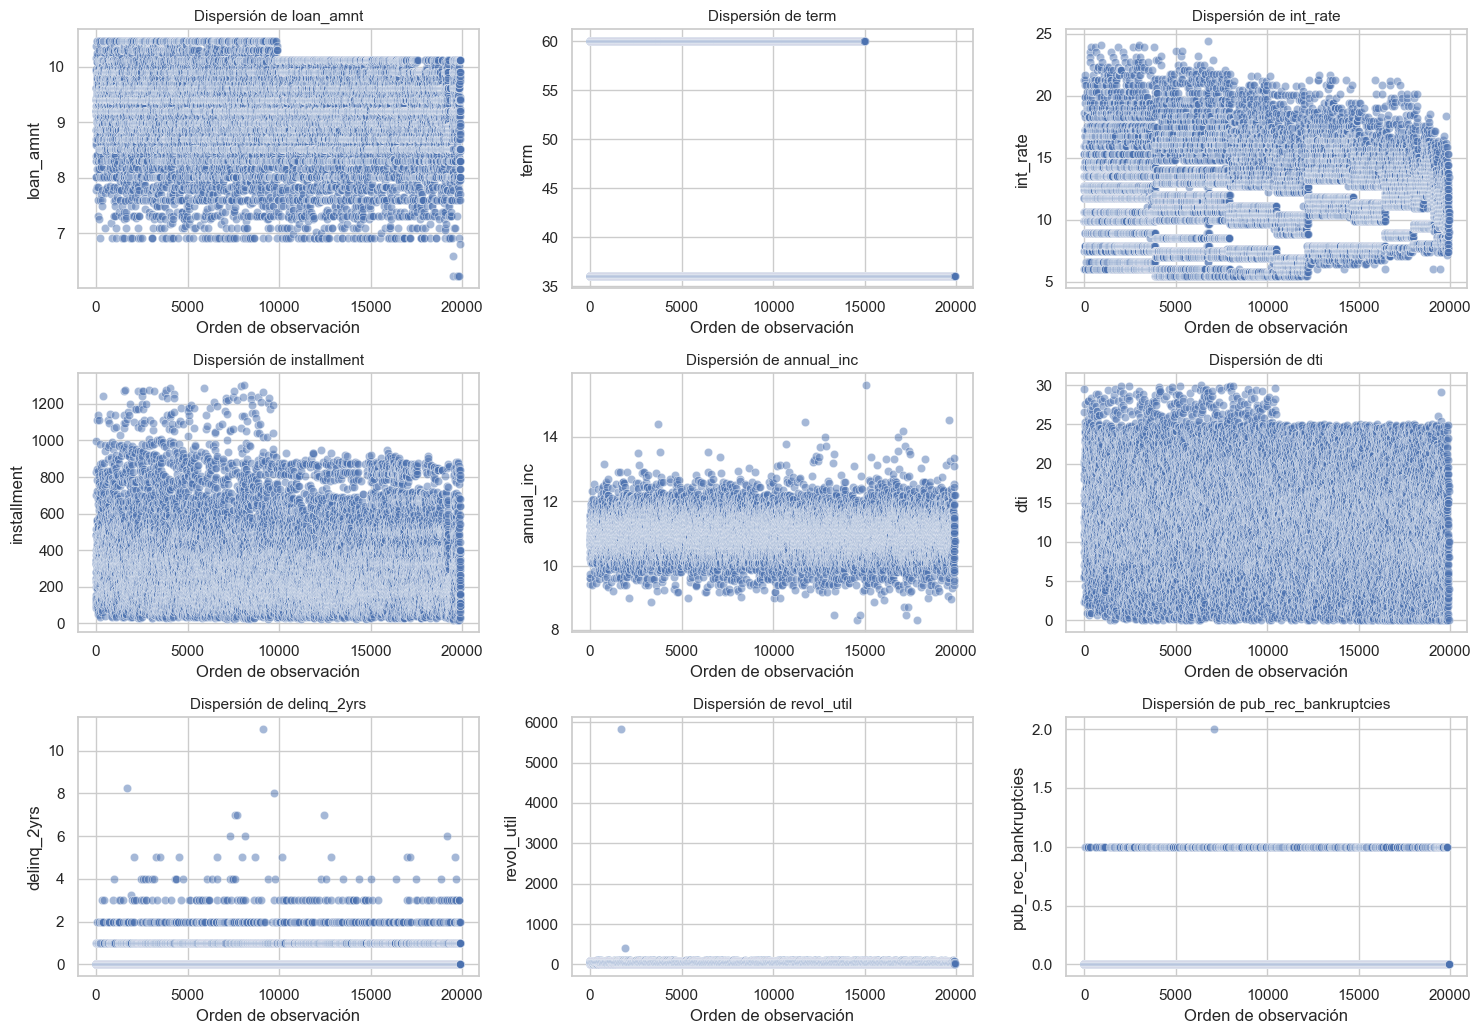


--- Barplots (variables discretas) ---


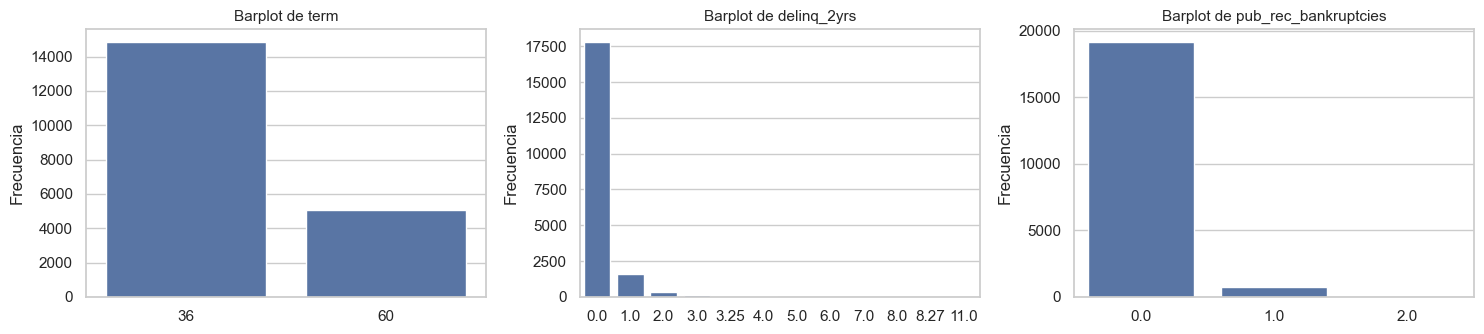

In [32]:
eda_univariado_numericas(df_clas_inter, num_clas, "Dataset de Clasificación")

### 4.2) Categóricas: frecuencias y visualización

In [33]:
def eda_univariado_categoricas(df, cat_clas, nombre_dataset="Dataset"):
    print("\n====================================")
    print(f"Dataset: {nombre_dataset}")
    print("4.2) EDA UNIVARIADO — VARIABLES CATEGÓRICAS")
    print("====================================")

    # Identificar variables categóricas
    cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

    print("\nVariables categóricas analizadas:")
    print(cat_cols)

    if not cat_cols:
        print("No se identificaron variables categóricas.")
        return

    # -------------------------
    # Parámetros visuales automáticos
    # -------------------------
    n_vars = len(cat_cols)
    n_cols = 2 if n_vars <= 6 else 3
    n_rows = math.ceil(n_vars / n_cols)

    # =============================
    # COUNT PLOTS (Top 10)
    # =============================
    print("\n--- Countplots (Top 10 categorías) ---")

    plt.figure(figsize=(6*n_cols, 3.5*n_rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(n_rows, n_cols, i)

        order = df[col].value_counts().head(10).index

        sns.countplot(
            y=col,
            data=df,
            order=order
        )

        plt.title(f"Top 10 categorías — {col}", fontsize=11)
        plt.xlabel("Frecuencia")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

    # =============================
    # TABLAS DE FRECUENCIAS (Top 10)
    # =============================
    print("\n--- Tablas de frecuencia (Top 10) ---")

    for col in cat_cols:
        print(f"\nVariable categórica: {col}")

        freq_table = (
            df[col]
            .value_counts(dropna=False)
            .to_frame("frecuencia")
        )

        freq_table["frecuencia_relativa"] = (
            freq_table["frecuencia"] / freq_table["frecuencia"].sum()
        ).round(3)

        display(freq_table.head(10))


Dataset: Dataset de Clasificación
4.2) EDA UNIVARIADO — VARIABLES CATEGÓRICAS

Variables categóricas analizadas:
['grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'application_type']

--- Countplots (Top 10 categorías) ---


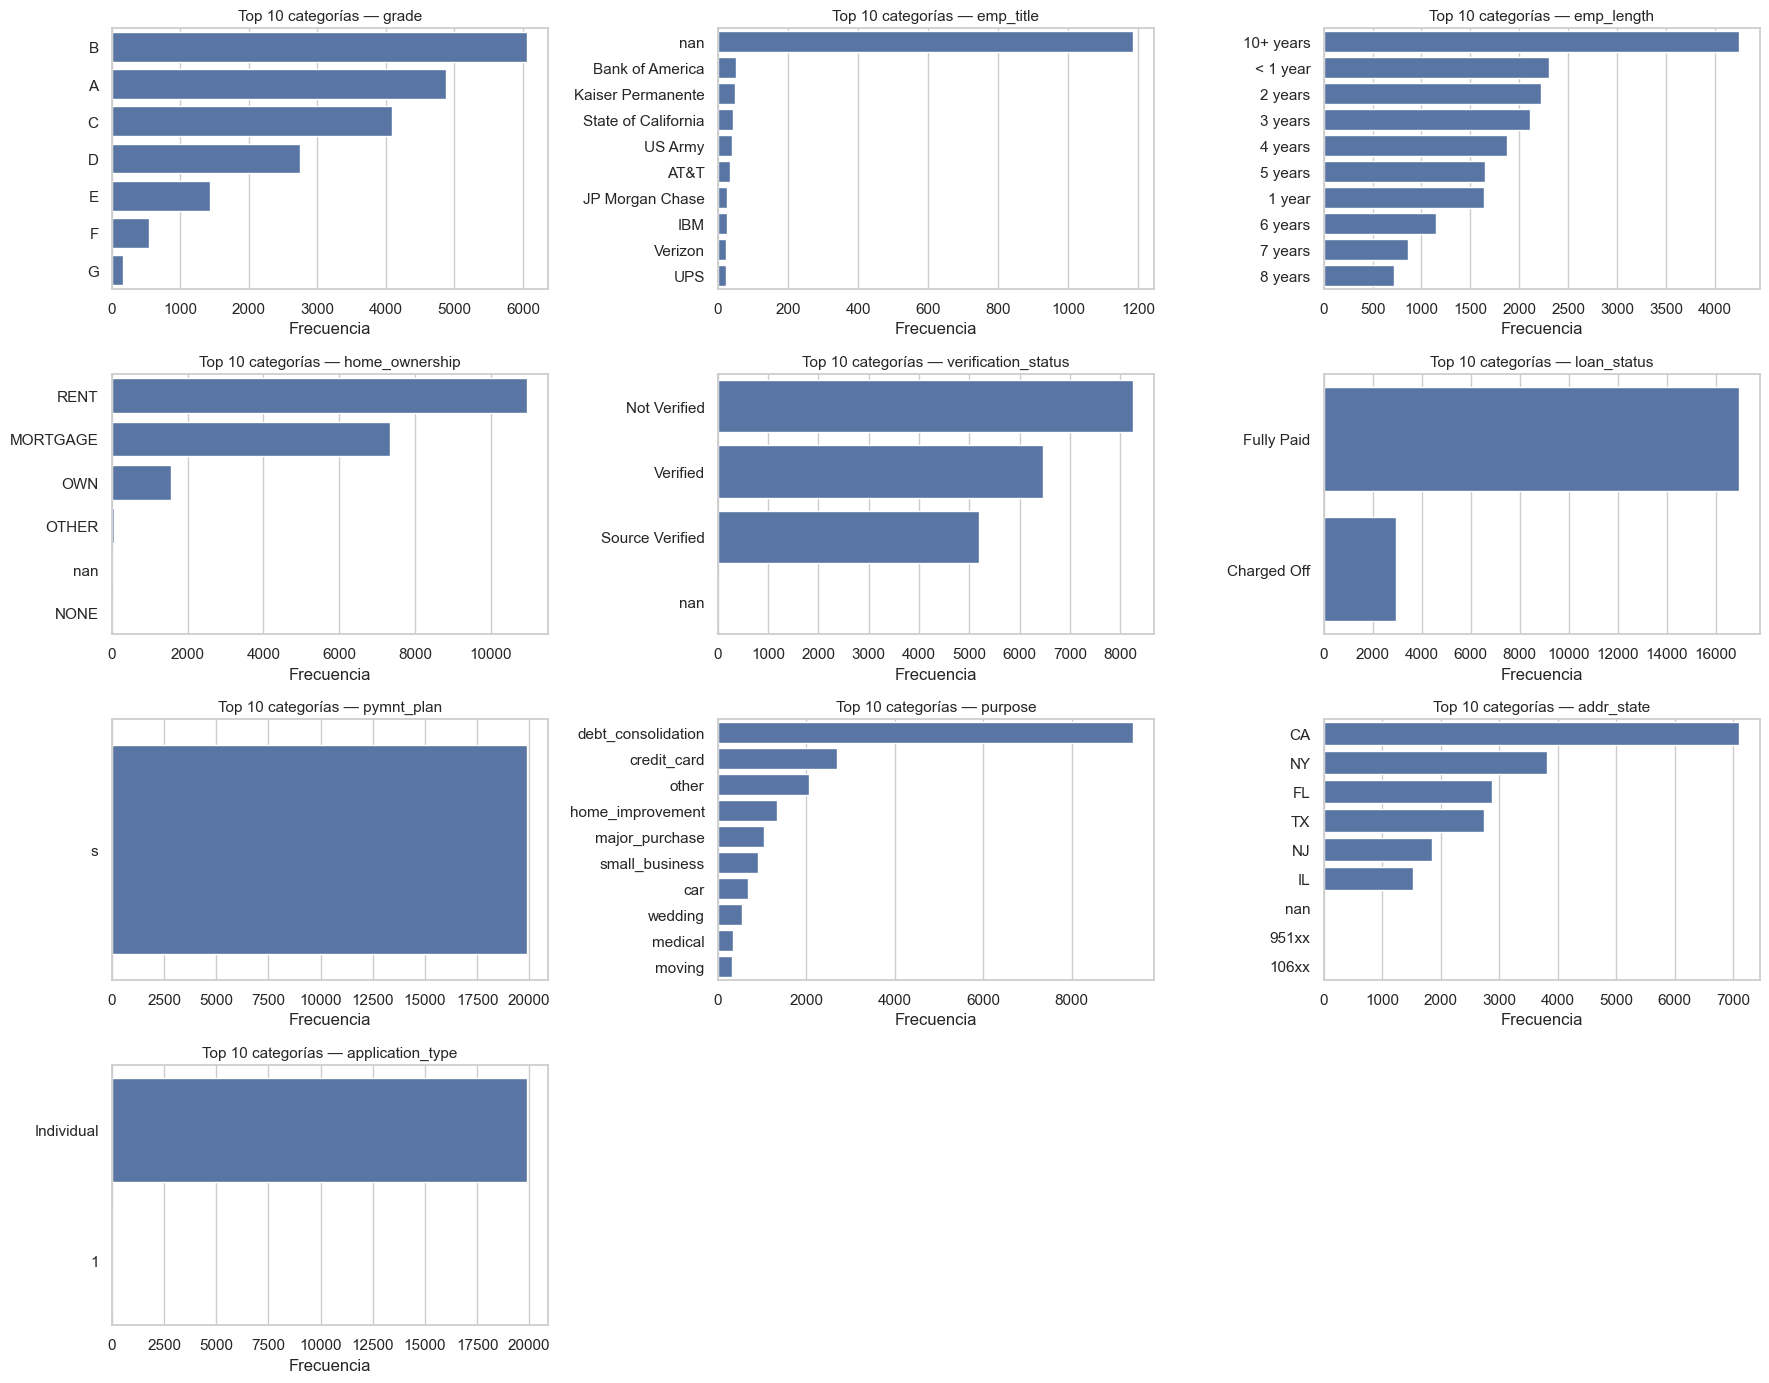


--- Tablas de frecuencia (Top 10) ---

Variable categórica: grade


,frecuencia,frecuencia_relativa
grade,,
B,6065,0.305
A,4875,0.245
C,4087,0.205
D,2748,0.138
E,1434,0.072
F,540,0.027
G,159,0.008



Variable categórica: emp_title


,frecuencia,frecuencia_relativa
emp_title,,
nan,1185,0.060
Bank of America,53,0.003
Kaiser Permanente,50,0.003
State of California,43,0.002
US Army,41,0.002
AT&T,36,0.002
JP Morgan Chase,27,0.001
IBM,26,0.001
Verizon,24,0.001



Variable categórica: emp_length


,frecuencia,frecuencia_relativa
emp_length,,
10+ years,4249,0.213
< 1 year,2304,0.116
2 years,2218,0.111
3 years,2108,0.106
4 years,1871,0.094
5 years,1649,0.083
1 year,1636,0.082
6 years,1151,0.058
7 years,867,0.044



Variable categórica: home_ownership


,frecuencia,frecuencia_relativa
home_ownership,,
RENT,10965,0.551
MORTGAGE,7349,0.369
OWN,1546,0.078
OTHER,44,0.002
nan,3,0.000
NONE,1,0.000



Variable categórica: verification_status


,frecuencia,frecuencia_relativa
verification_status,,
Not Verified,8256,0.415
Verified,6464,0.325
Source Verified,5185,0.260
nan,3,0.000



Variable categórica: loan_status


,frecuencia,frecuencia_relativa
loan_status,,
Fully Paid,16962,0.852
Charged Off,2943,0.148
NaN,3,0.000



Variable categórica: pymnt_plan


,frecuencia,frecuencia_relativa
pymnt_plan,,
s,19908,1.0



Variable categórica: purpose


,frecuencia,frecuencia_relativa
purpose,,
debt_consolidation,9387,0.472
credit_card,2696,0.135
other,2059,0.103
home_improvement,1330,0.067
major_purchase,1048,0.053
small_business,905,0.045
car,687,0.035
wedding,539,0.027
medical,350,0.018



Variable categórica: addr_state


,frecuencia,frecuencia_relativa
addr_state,,
CA,7101,0.357
NY,3813,0.192
FL,2870,0.144
TX,2733,0.137
NJ,1855,0.093
IL,1525,0.077
nan,9,0.000
951xx,1,0.000
106xx,1,0.000



Variable categórica: application_type


,frecuencia,frecuencia_relativa
application_type,,
Individual,19906,1.0
1,2,0.0


In [34]:
eda_univariado_categoricas(df_clas_inter, cat_clas, "Dataset de Clasificación")

## 5) EDA bivariado: variables explicativas vs target

In [35]:
df_clas_inter

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,revol_util,application_type,pub_rec_bankruptcies
0,7.783641,36,15.96,84.33,C,nan,10+ years,RENT,9.413526,Not Verified,Fully Paid,s,small_business,IL,8.72,0.0,98.5,Individual,0.0
1,9.210440,36,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,10.803669,Source Verified,Fully Paid,s,other,CA,20.00,0.0,21.0,Individual,0.0
2,8.006701,36,18.64,109.43,E,MKC Accounting,9 years,RENT,10.778977,Source Verified,Fully Paid,s,car,CA,5.35,0.0,87.5,Individual,0.0
3,8.630700,60,21.28,152.39,F,nan,4 years,OWN,10.596660,Source Verified,Charged Off,s,small_business,CA,5.55,0.0,32.6,Individual,0.0
4,8.589700,60,12.69,121.45,B,Starbucks,< 1 year,RENT,9.615872,Verified,Charged Off,s,other,TX,18.08,0.0,36.5,Individual,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19903,8.517393,36,9.01,159.03,B,Ping Interactive,1 year,MORTGAGE,12.429220,Not Verified,Fully Paid,s,other,NY,10.00,2.0,36.6,Individual,0.0
19904,8.160804,36,9.96,112.87,B,UNIQUE ID WEB DESIGN,< 1 year,RENT,9.510519,Not Verified,Fully Paid,s,educational,FL,16.44,0.0,41.1,Individual,0.0
19905,10.126671,36,10.59,813.65,C,Institute for Mind/Body Research and Education,2 years,RENT,10.778977,Not Verified,Fully Paid,s,small_business,NY,4.05,0.0,23.3,Individual,0.0
19906,8.006701,36,10.28,97.20,C,Oracle,2 years,MORTGAGE,12.206078,Not Verified,Fully Paid,s,home_improvement,NY,0.00,1.0,0.0,Individual,0.0


### 5.2 Para Clasificación

#### 5.2.1) Numéricas vs Target

In [37]:
# 1. Boxplot por clase (separación de clases)
def boxplot_por_clase(df, num_cols, target):
    """
    Genera boxplots de variables numéricas separados por clase del target.
    """
    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df_temp, x=target, y=col)
        plt.title(f'Boxplot de {col} por {target}')
        plt.xlabel(target)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

In [38]:
# 2. Tasa por buckets (umbrales y no linealidad)
def tasa_por_buckets_clasificacion(df, num_cols, target, q=5):
    """
    Calcula tasa del target (proporción clase positiva) por buckets.
    Genera tabla con bucket, n, y tasa del target.
    """
    # Convertir target a numérico si es necesario
    target_mapping = df[target].unique()
    print(f"Clases del target: {target_mapping}")
    
    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        # Crear variable binaria para el target
        df_temp['target_bin'] = (df_temp[target] == target_mapping[0]).astype(int)
        
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')
        
        stats = df_temp.groupby('bucket').agg(
            n=('target_bin', 'count'),
            tasa_target=('target_bin', 'mean')
        ).round(4).reset_index()
        
        print(f"\n{'='*50}")
        print(f"Tasa de '{target_mapping[0]}' por quintiles de {col}")
        print(f"{'='*50}")
        display(stats)
        
        # Gráfico de tasa por bucket
        plt.figure(figsize=(10, 5))
        plt.bar(stats['bucket'].astype(str), stats['tasa_target'], color='steelblue', edgecolor='black')
        plt.axhline(y=df_temp['target_bin'].mean(), color='red', linestyle='--', label='Tasa global')
        plt.title(f'Tasa de {target_mapping[0]} por quintiles de {col}')
        plt.xlabel(f'Quintiles de {col}')
        plt.ylabel(f'Tasa de {target_mapping[0]}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [39]:
# 3. Tendencia (monotonía/umbral)
def tendencia_buckets_clasificacion(df, num_cols, target, q=5):
    """
    Evalúa monotonía de la tasa del target por buckets.
    """
    target_mapping = df[target].unique()
    
    print(f"\n{'='*60}")
    print(f"ANÁLISIS DE TENDENCIA - Tasa de '{target_mapping[0]}' por buckets")
    print(f"{'='*60}")
    
    for col in num_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        df_temp['target_bin'] = (df_temp[target] == target_mapping[0]).astype(int)
        df_temp['bucket'] = pd.qcut(df_temp[col], q=q, duplicates='drop')
        
        tasas = df_temp.groupby('bucket')['target_bin'].mean().values
        diffs = np.diff(tasas)
        
        if np.all(diffs >= 0):
            tendencia = 'Creciente (monótona no decreciente)'
        elif np.all(diffs <= 0):
            tendencia = 'Decreciente (monótona no creciente)'
        else:
            tendencia = 'No monótona (con puntos de quiebre)'
        
        print(f"{col}: {tendencia} | Tasas por bucket: {np.round(tasas, 4)}")

5.2.1) NUMÉRICAS vs TARGET (Clasificación)


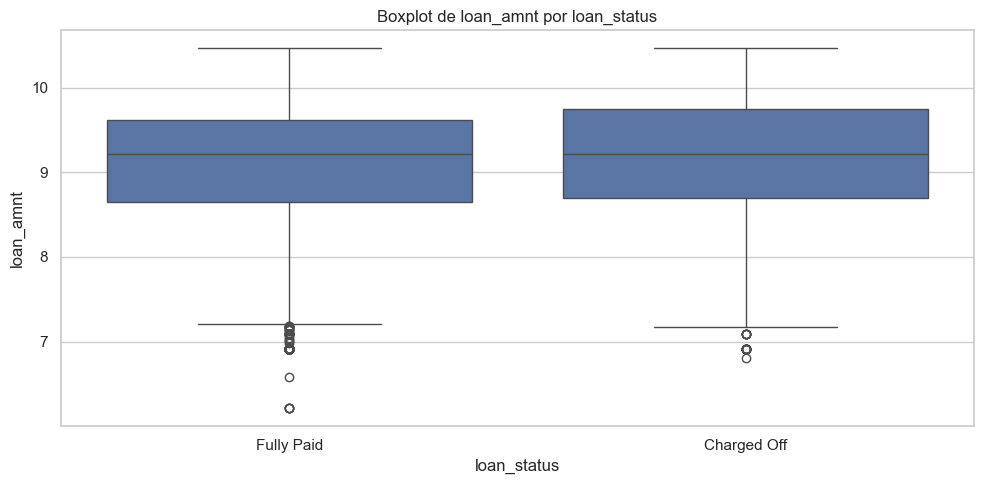

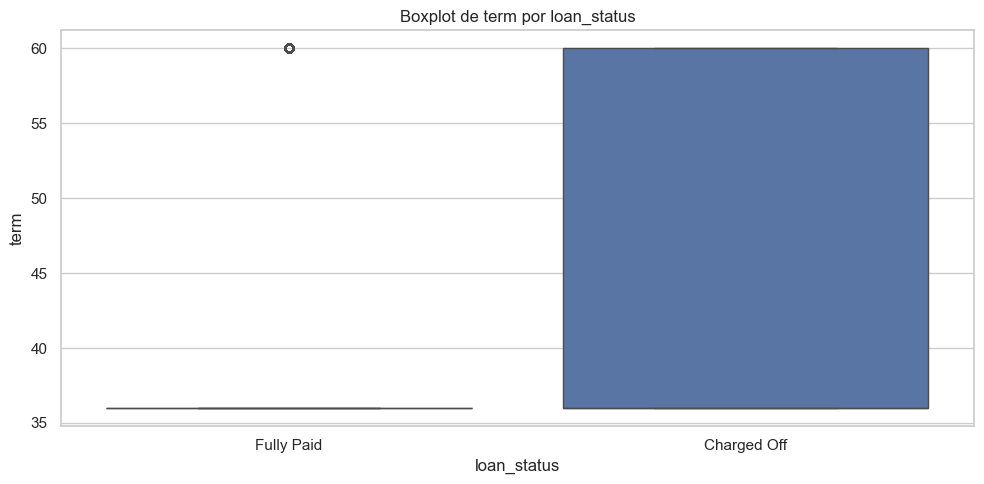

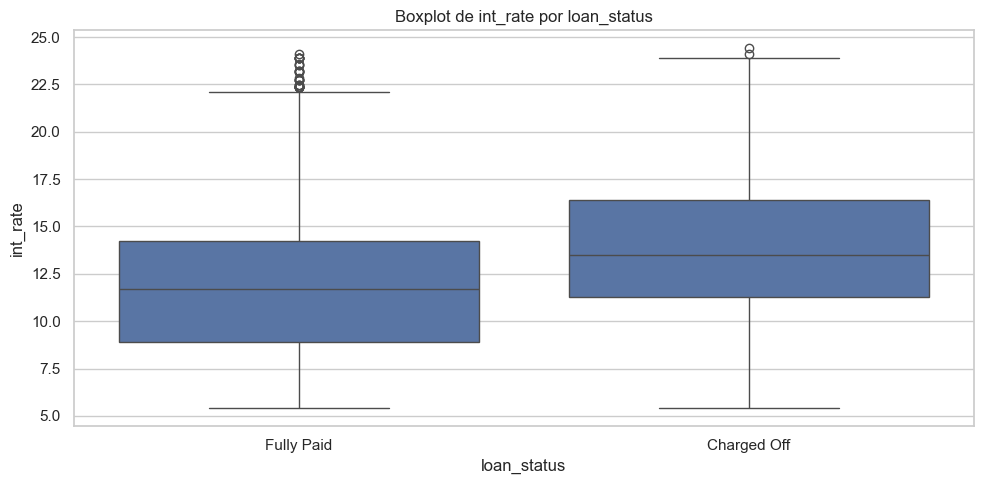

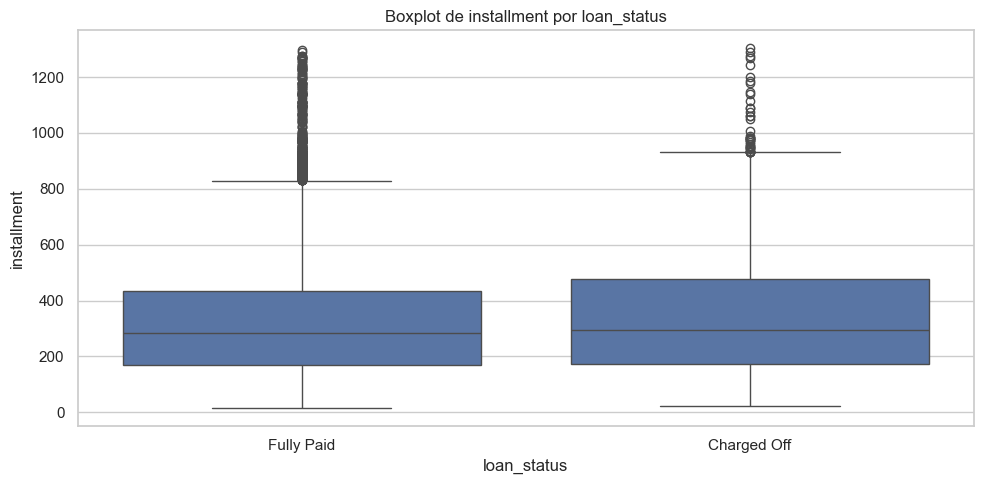

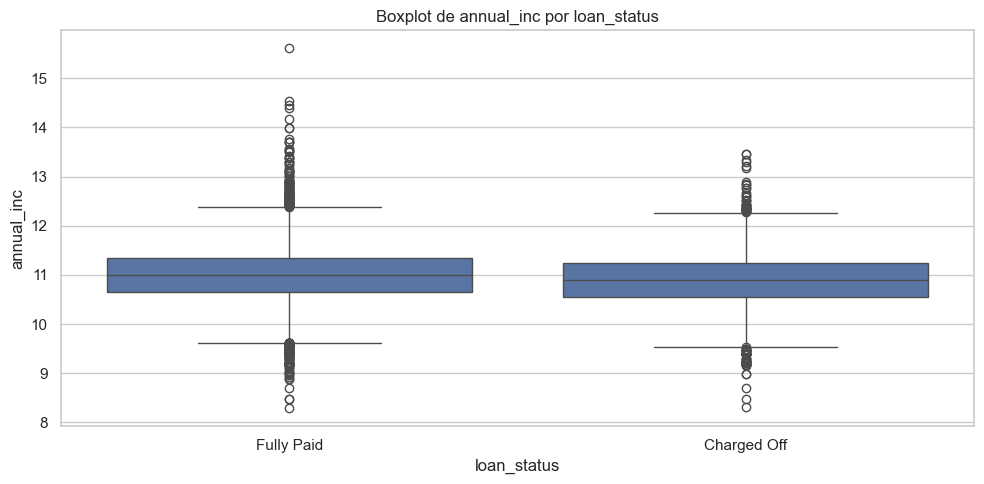

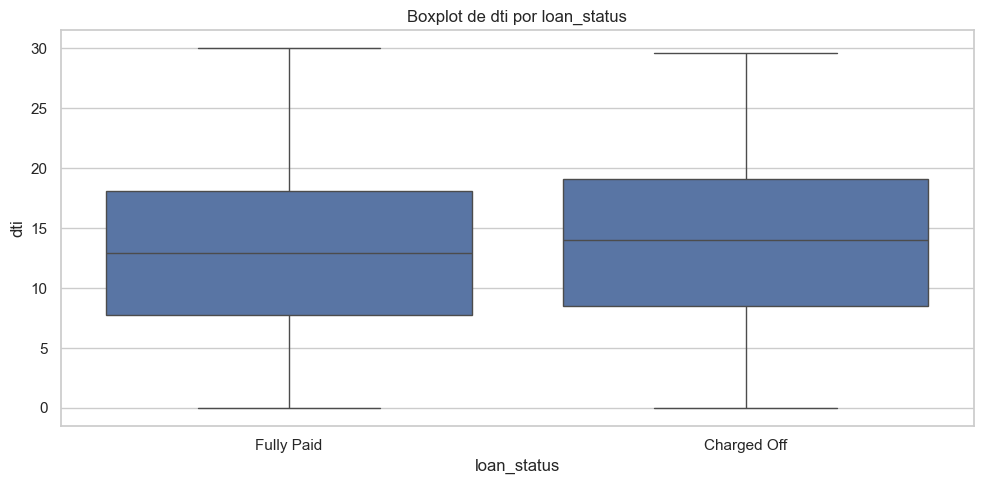

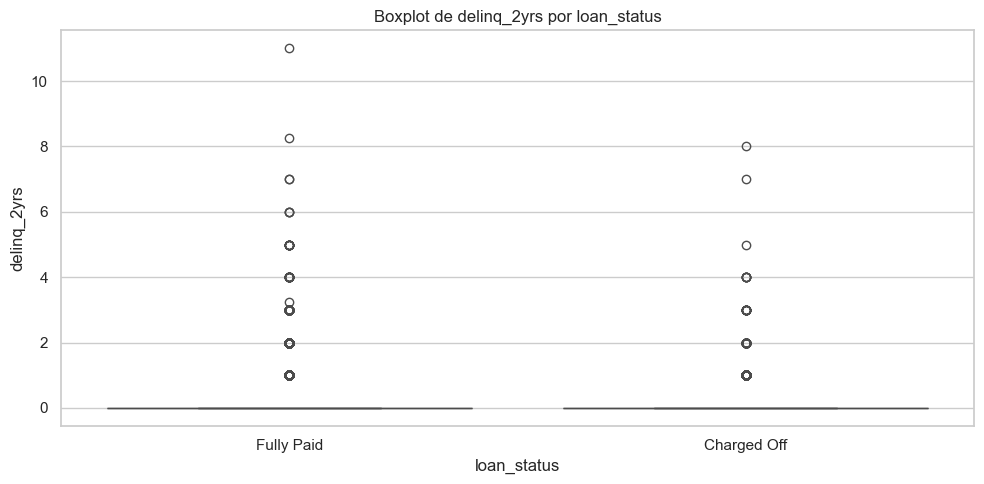

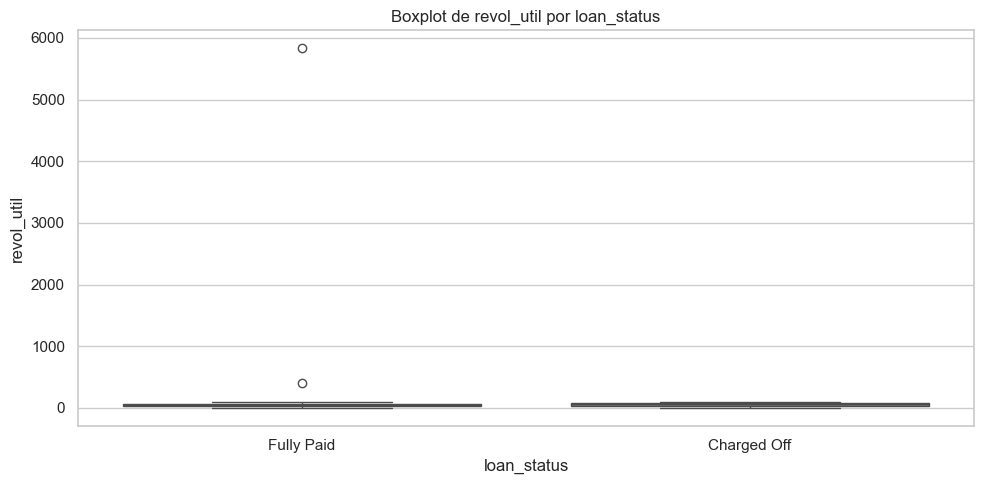

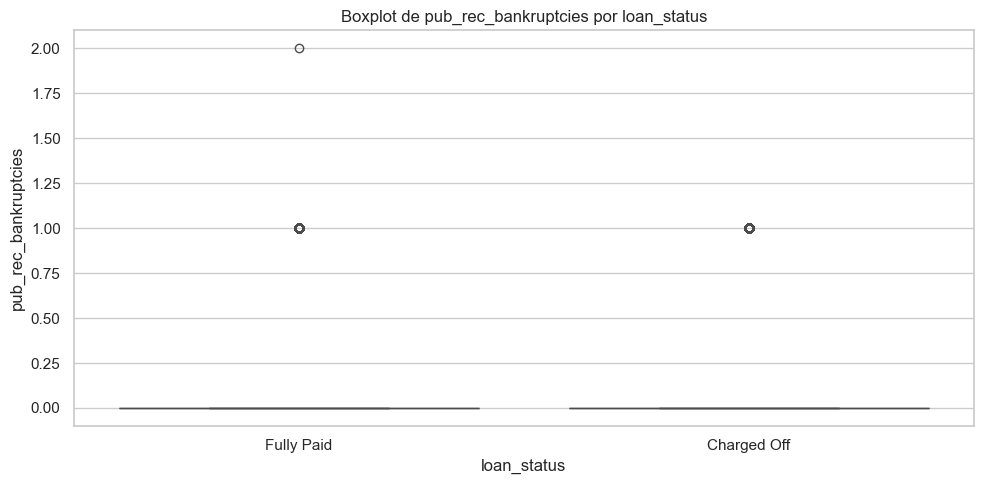

Clases del target: ['Fully Paid' 'Charged Off' nan]

Tasa de 'Fully Paid' por quintiles de loan_amnt


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(6.215999999999999, 8.517]",4576,0.8521
1,"(8.517, 8.987]",4000,0.8748
2,"(8.987, 9.393]",4436,0.8677
3,"(9.393, 9.741]",2986,0.8520
4,"(9.741, 10.463]",3907,0.8116


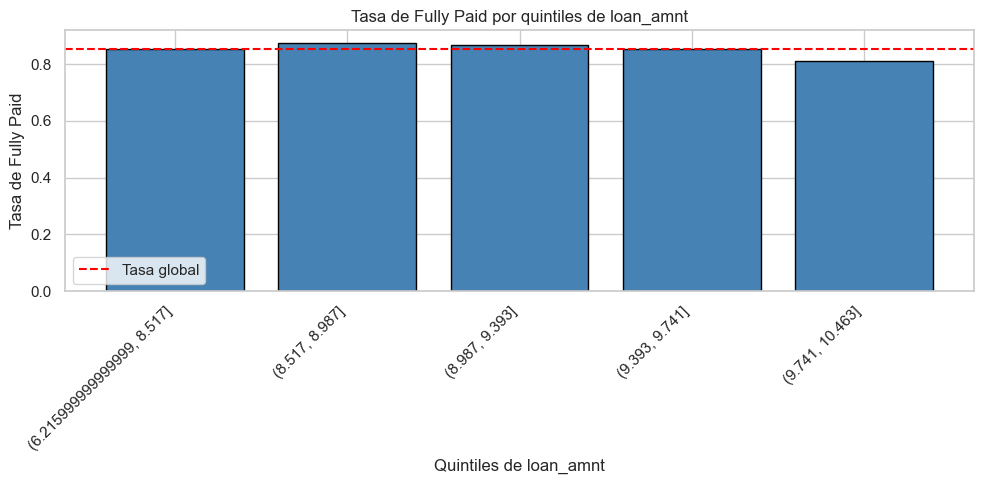


Tasa de 'Fully Paid' por quintiles de term


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(35.999, 60.0]",19905,0.8521


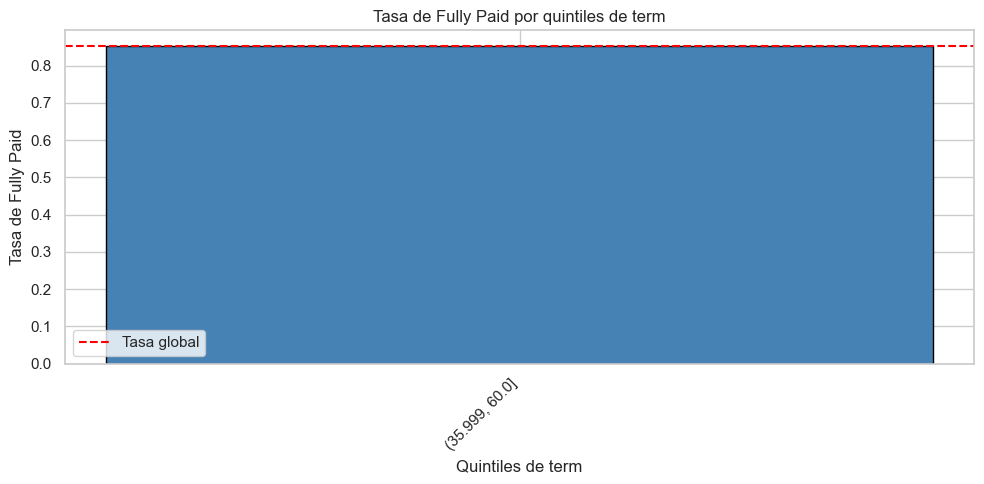


Tasa de 'Fully Paid' por quintiles de int_rate


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(5.419, 8.32]",3993,0.9454
1,"(8.32, 10.99]",4058,0.8879
2,"(10.99, 12.99]",4040,0.8483
3,"(12.99, 15.28]",3897,0.8314
4,"(15.28, 24.4]",3917,0.7447


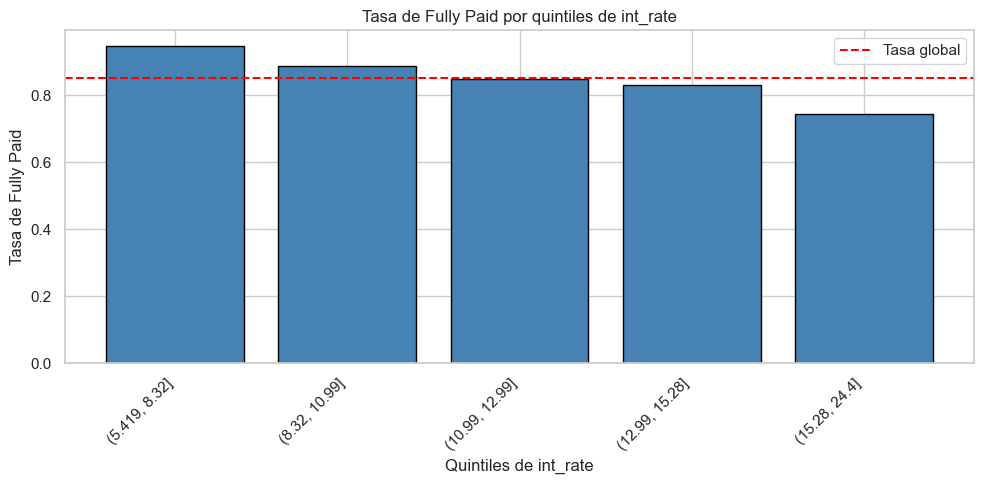


Tasa de 'Fully Paid' por quintiles de installment


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(15.689, 154.708]",3981,0.8488
1,"(154.708, 238.15]",3986,0.8628
2,"(238.15, 336.728]",3976,0.8624
3,"(336.728, 491.03]",3983,0.8584
4,"(491.03, 1302.69]",3979,0.8283


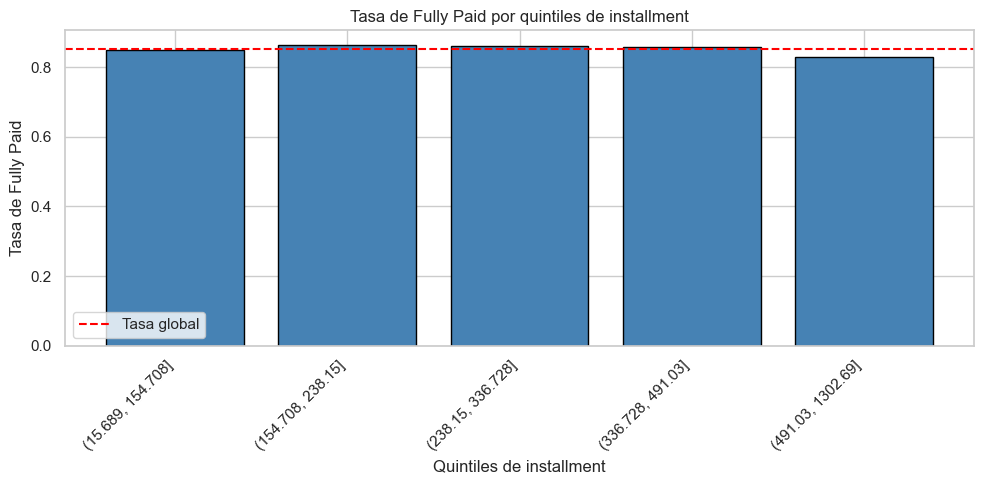


Tasa de 'Fully Paid' por quintiles de annual_inc


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(8.293000000000001, 10.556]",3982,0.8154
1,"(10.556, 10.859]",4085,0.8350
2,"(10.859, 11.127]",3914,0.8544
3,"(11.127, 11.44]",3948,0.8690
4,"(11.44, 15.607]",3976,0.8876


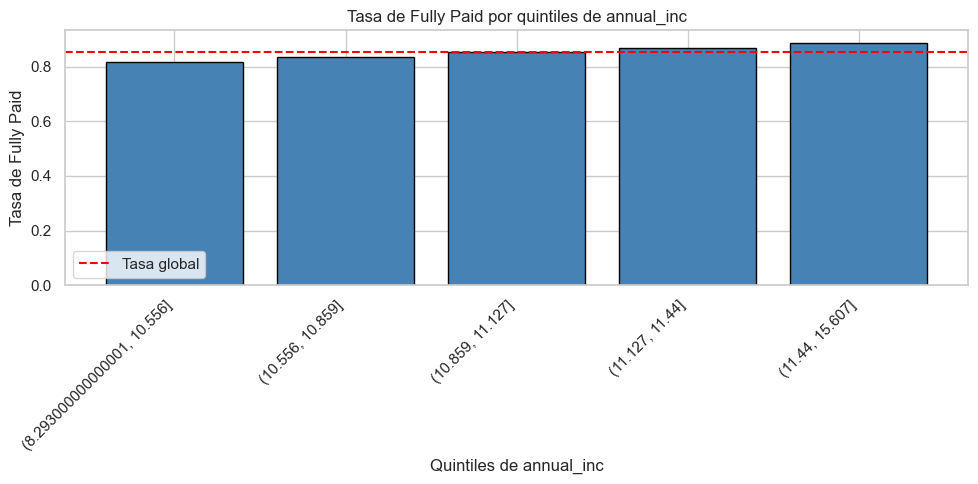


Tasa de 'Fully Paid' por quintiles de dti


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(-0.001, 6.648]",3981,0.8659
1,"(6.648, 11.02]",3984,0.8675
2,"(11.02, 15.02]",3989,0.8566
3,"(15.02, 19.44]",3978,0.8421
4,"(19.44, 29.99]",3973,0.8286


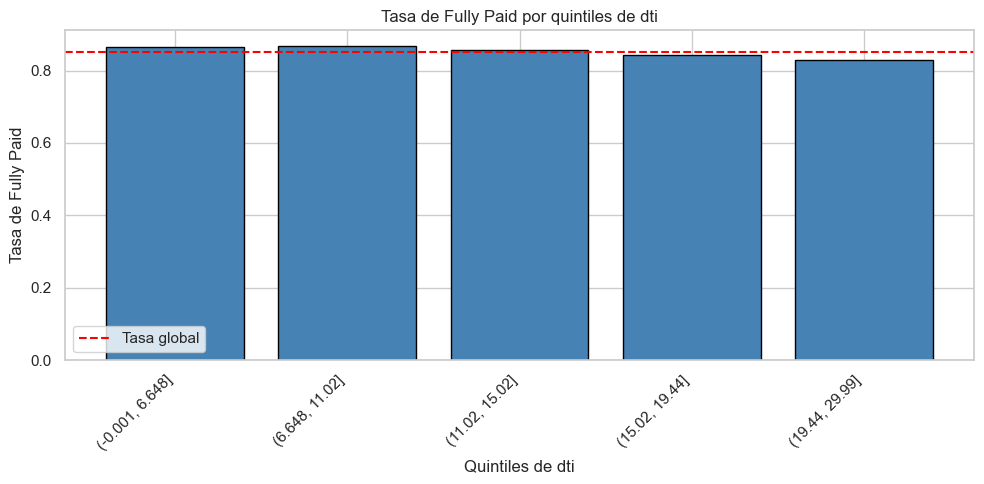


Tasa de 'Fully Paid' por quintiles de delinq_2yrs


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(-0.001, 11.0]",19905,0.8521


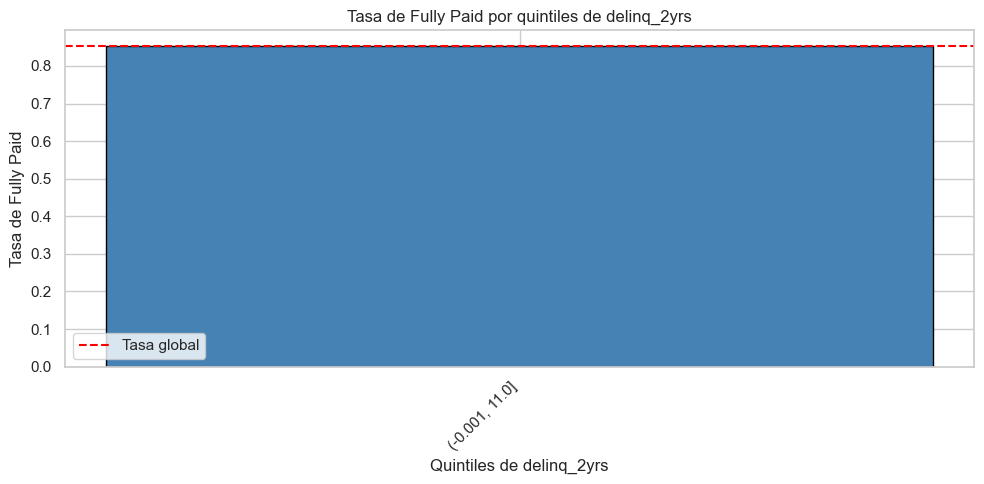


Tasa de 'Fully Paid' por quintiles de revol_util


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(-0.001, 21.1]",3990,0.8917
1,"(21.1, 41.0]",3996,0.8769
2,"(41.0, 59.1]",3978,0.8560
3,"(59.1, 77.6]",3974,0.8342
4,"(77.6, 5829.0]",3967,0.8016


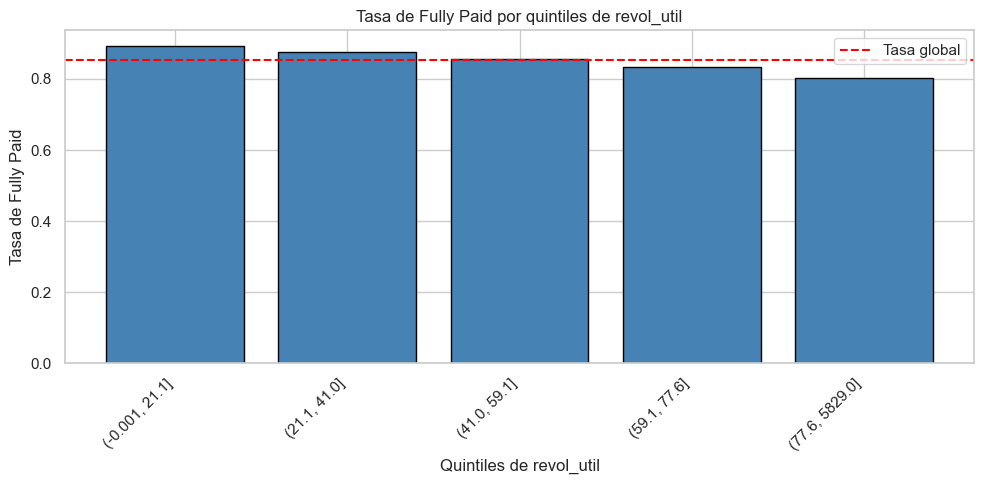


Tasa de 'Fully Paid' por quintiles de pub_rec_bankruptcies


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1813871194.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_temp.groupby('bucket').agg(


,bucket,n,tasa_target
0,"(-0.001, 2.0]",19905,0.8521


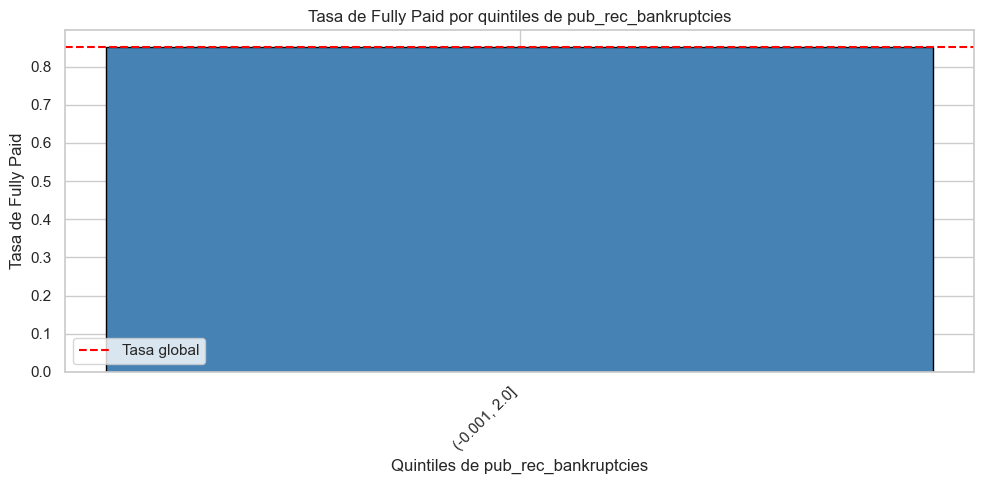

C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1039370737.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_temp.groupby('bucket')['target_bin'].mean().values
C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1039370737.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_temp.groupby('bucket')['target_bin'].mean().values
C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1039370737.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f


ANÁLISIS DE TENDENCIA - Tasa de 'Fully Paid' por buckets
loan_amnt: No monótona (con puntos de quiebre) | Tasas por bucket: [0.8521 0.8748 0.8677 0.852  0.8116]
term: Creciente (monótona no decreciente) | Tasas por bucket: [0.8521]
int_rate: Decreciente (monótona no creciente) | Tasas por bucket: [0.9454 0.8879 0.8483 0.8314 0.7447]
installment: No monótona (con puntos de quiebre) | Tasas por bucket: [0.8488 0.8628 0.8624 0.8584 0.8283]
annual_inc: Creciente (monótona no decreciente) | Tasas por bucket: [0.8154 0.835  0.8544 0.869  0.8876]
dti: No monótona (con puntos de quiebre) | Tasas por bucket: [0.8659 0.8675 0.8566 0.8421 0.8286]
delinq_2yrs: Creciente (monótona no decreciente) | Tasas por bucket: [0.8521]
revol_util: Decreciente (monótona no creciente) | Tasas por bucket: [0.8917 0.8769 0.856  0.8342 0.8016]
pub_rec_bankruptcies: Creciente (monótona no decreciente) | Tasas por bucket: [0.8521]


C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1039370737.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_temp.groupby('bucket')['target_bin'].mean().values
C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1039370737.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasas = df_temp.groupby('bucket')['target_bin'].mean().values
C:\Users\leydi\AppData\Local\Temp\ipykernel_42916\1039370737.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

In [40]:
# Aplicar análisis de numéricas vs target para clasificación
print("="*60)
print("5.2.1) NUMÉRICAS vs TARGET (Clasificación)")
print("="*60)

boxplot_por_clase(df_clas_inter, num_clas, TARGET_CLAS)
tasa_por_buckets_clasificacion(df_clas_inter, num_clas, TARGET_CLAS)
tendencia_buckets_clasificacion(df_clas_inter, num_clas, TARGET_CLAS)

#### 5.2.2) Categóricas vs Target

In [41]:
# 1. Tasa por categoría (señal predictiva por grupo)
def tasa_por_categoria(df, cat_cols, target):
    """
    Calcula tasa del target por categoría.
    Genera tabla y gráfico de barras.
    """
    target_mapping = df[target].unique()
    print(f"Clases del target: {target_mapping}")
    
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        df_temp['target_bin'] = (df_temp[target] == target_mapping[0]).astype(int)
        
        stats = df_temp.groupby(col).agg(
            n=('target_bin', 'count'),
            tasa_target=('target_bin', 'mean')
        ).round(4).sort_values('tasa_target', ascending=False).reset_index()
        
        print(f"\n{'='*50}")
        print(f"Tasa de '{target_mapping[0]}' por categoría: {col}")
        print(f"{'='*50}")
        display(stats)
        
        # Gráfico de barras (top 15)
        top_stats = stats.head(15)
        
        plt.figure(figsize=(12, 5))
        bars = plt.bar(top_stats[col].astype(str), top_stats['tasa_target'], 
                       color='steelblue', edgecolor='black')
        plt.axhline(y=df_temp['target_bin'].mean(), color='red', linestyle='--', 
                    label=f'Tasa global: {df_temp["target_bin"].mean():.4f}')
        plt.title(f'Tasa de {target_mapping[0]} por {col} (Top 15)')
        plt.xlabel(col)
        plt.ylabel(f'Tasa de {target_mapping[0]}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [42]:
# 2. Registros por categoría (evitar n pequeño)
def registros_por_categoria_clas(df, cat_cols, target):
    """
    Cuenta registros por categoría.
    Identifica categorías con pocos registros.
    """
    for col in cat_cols:
        df_temp = df[[col, target]].dropna()
        if df_temp.empty:
            print(f"Sin datos para {col}")
            continue
        
        conteo = df_temp.groupby(col).size().reset_index(name='n')
        conteo['pct_total'] = (conteo['n'] / conteo['n'].sum() * 100).round(2)
        conteo = conteo.sort_values('n', ascending=False)
        
        print(f"\n{'='*50}")
        print(f"Registros por categoría: {col}")
        print(f"{'='*50}")
        display(conteo)
        
        # Identificar categorías raras (< 1%)
        raras = conteo[conteo['pct_total'] < 1]
        if not raras.empty:
            print(f"\n⚠️ Categorías raras (<1%): {len(raras)} de {len(conteo)}")
            display(raras)

5.2.2) CATEGÓRICAS vs TARGET (Clasificación)
Clases del target: ['Fully Paid' 'Charged Off' nan]

Tasa de 'Fully Paid' por categoría: grade


,grade,n,tasa_target
0,A,4875,0.9376
1,B,6064,0.8715
2,C,4086,0.8355
3,D,2748,0.7893
4,E,1433,0.7362
5,F,540,0.6778
6,G,159,0.6415


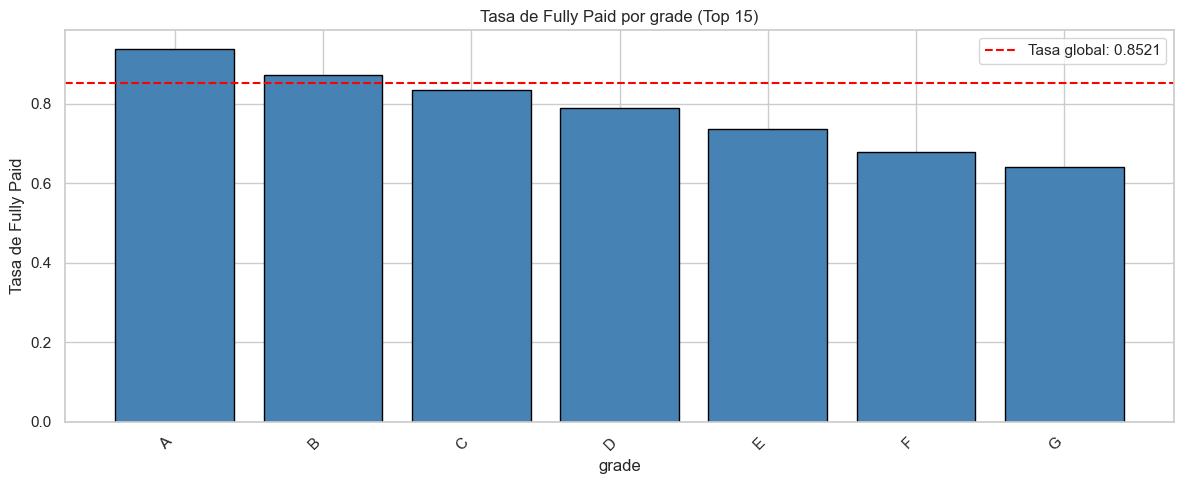


Tasa de 'Fully Paid' por categoría: emp_title


,emp_title,n,tasa_target
0,zeno office solutions,1,1.0
1,(Collaborative) Abbott Nutrition Intl,1,1.0
2,wrisco,1,1.0
3,world confections inc,1,1.0
4,wood you furniture,1,1.0
...,...,...,...
14926,University of Utah,1,0.0
14927,Sterling Equities,1,0.0
14928,Us Army,1,0.0
14929,Urban Pathways,1,0.0


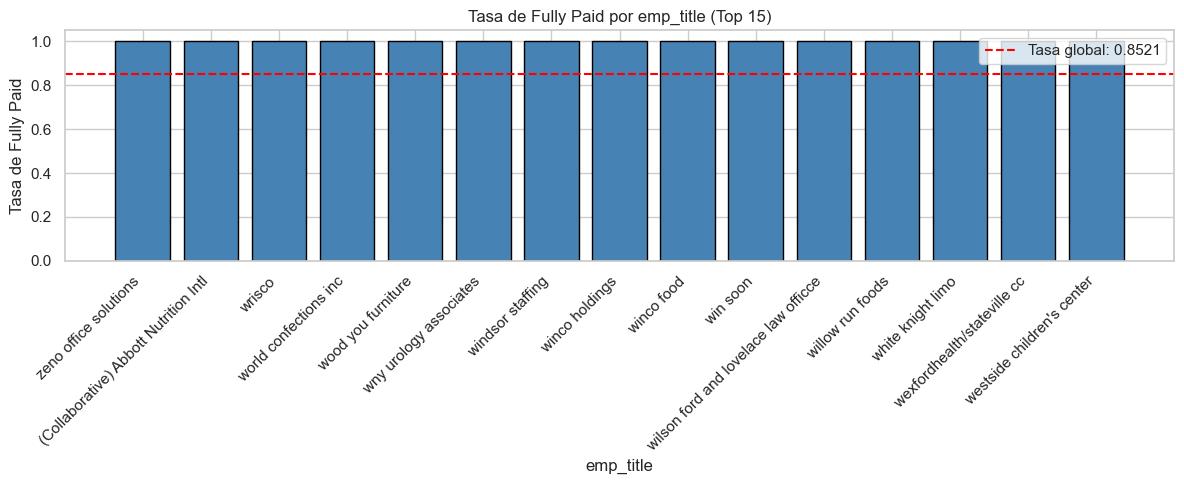


Tasa de 'Fully Paid' por categoría: emp_length


,emp_length,n,tasa_target
0,2 years,2218,0.8742
1,9 years,635,0.8693
2,3 years,2108,0.8643
3,< 1 year,2304,0.8628
4,4 years,1871,0.8578
5,1 year,1636,0.8521
6,7 years,867,0.8501
7,8 years,718,0.8482
8,6 years,1151,0.8454
9,5 years,1649,0.8435


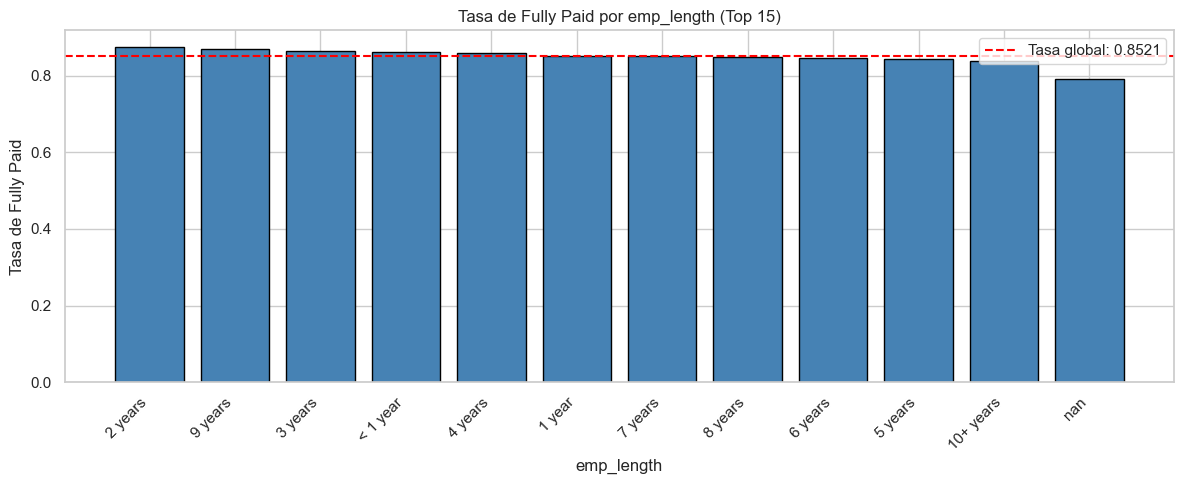


Tasa de 'Fully Paid' por categoría: home_ownership


,home_ownership,n,tasa_target
0,NONE,1,1.0000
1,MORTGAGE,7349,0.8613
2,RENT,10965,0.8476
3,OWN,1546,0.8415
4,OTHER,44,0.8182


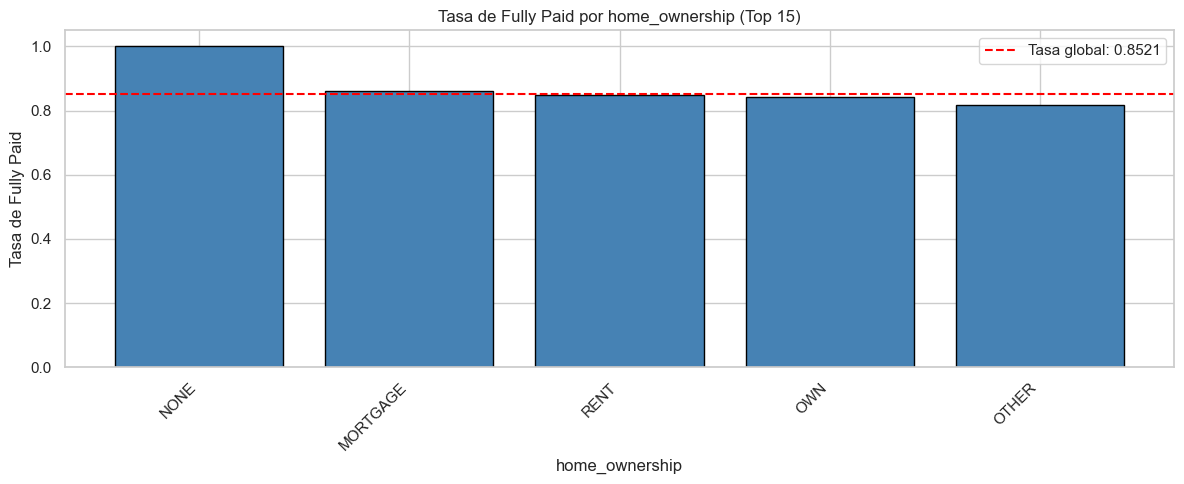


Tasa de 'Fully Paid' por categoría: verification_status


,verification_status,n,tasa_target
0,Not Verified,8256,0.8680
1,Source Verified,5185,0.8521
2,Verified,6464,0.8320


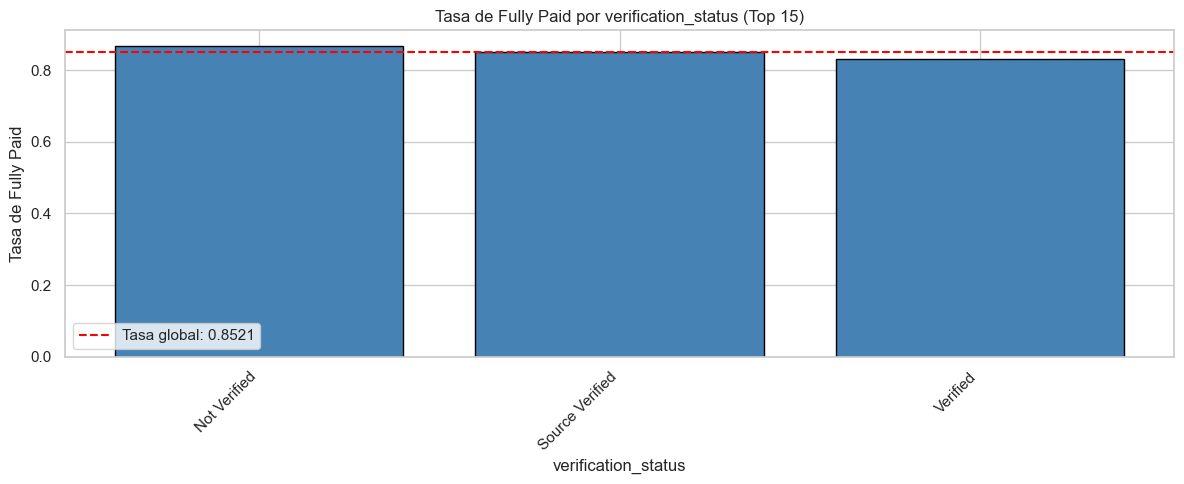


Tasa de 'Fully Paid' por categoría: pymnt_plan


,pymnt_plan,n,tasa_target
0,s,19905,0.8521


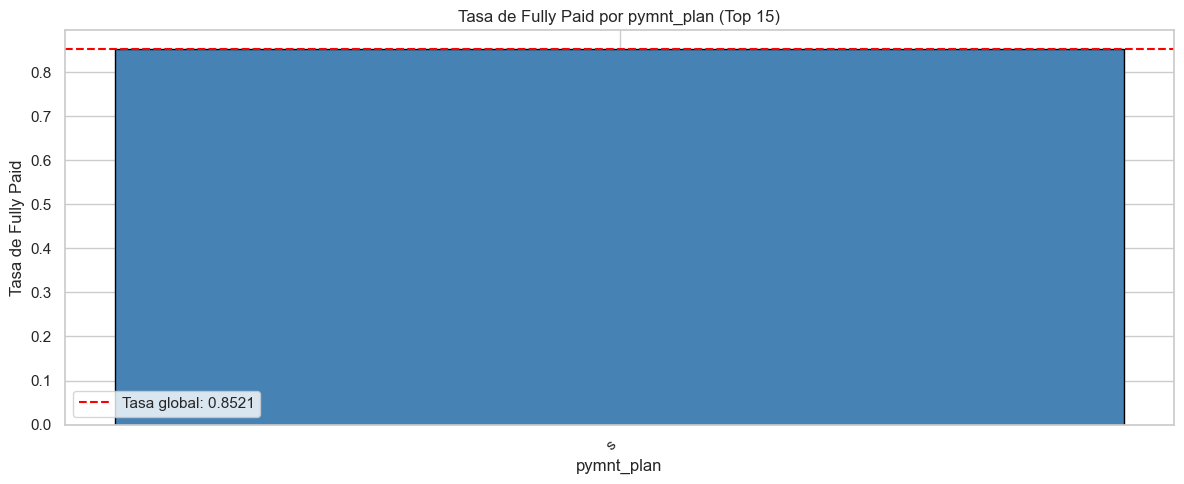


Tasa de 'Fully Paid' por categoría: purpose


,purpose,n,tasa_target
0,wedding,539,0.8942
1,car,687,0.8923
2,major_purchase,1048,0.8874
3,credit_card,2696,0.8858
4,home_improvement,1330,0.8752
5,renewable_energy,51,0.8627
6,vacation,199,0.8593
7,medical,350,0.8543
8,debt_consolidation,9387,0.8456
9,other,2059,0.8436


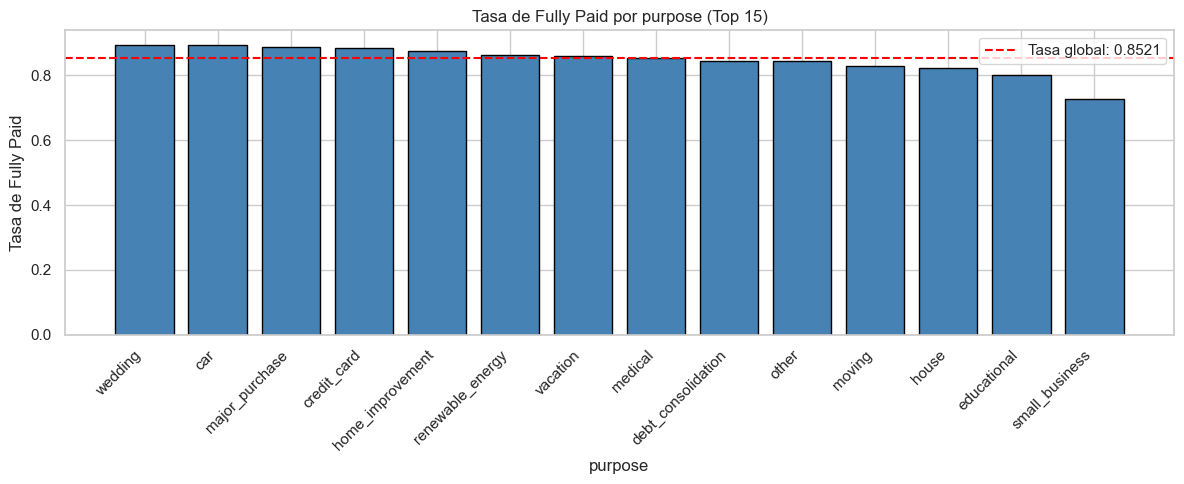


Tasa de 'Fully Paid' por categoría: addr_state


,addr_state,n,tasa_target
0,106xx,1,1.0000
1,951xx,1,1.0000
2,nan,6,1.0000
3,TX,2733,0.8822
4,IL,1525,0.8702
5,NY,3813,0.8686
6,NJ,1855,0.8480
7,CA,7101,0.8407
8,FL,2870,0.8226


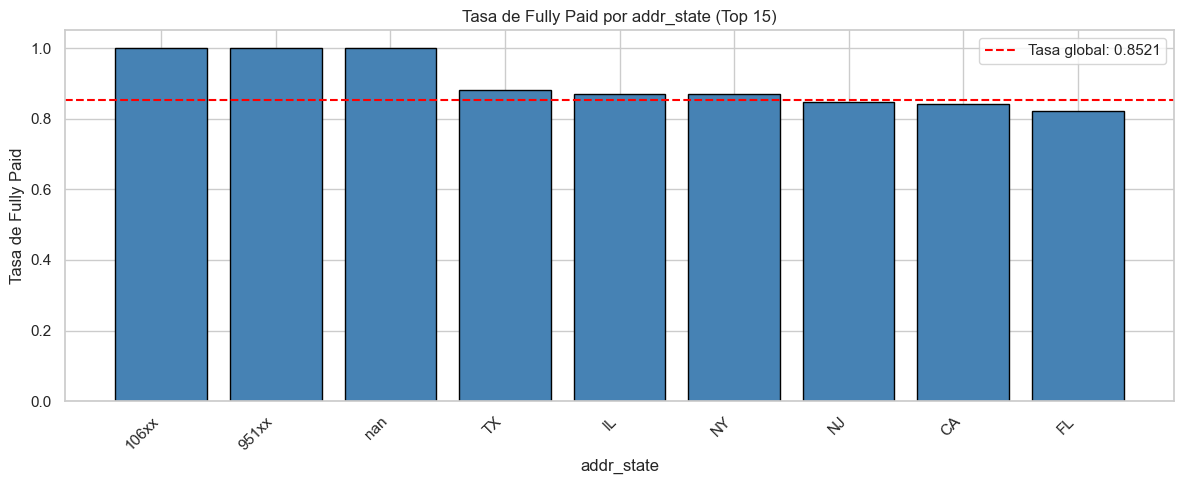


Tasa de 'Fully Paid' por categoría: application_type


,application_type,n,tasa_target
0,1,2,1.0000
1,Individual,19903,0.8521


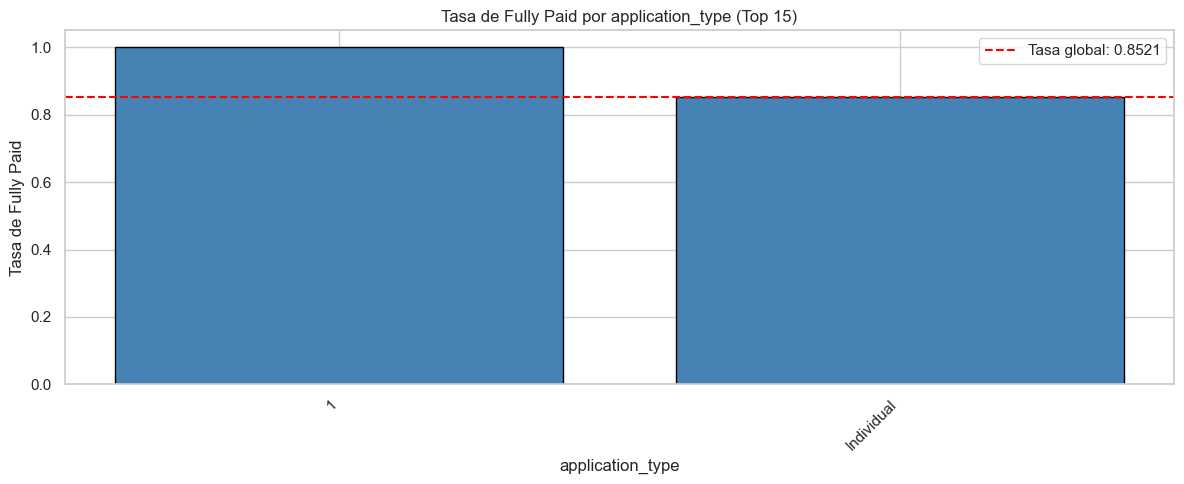

In [43]:
# Aplicar análisis de categóricas vs target para clasificación
print("="*60)
print("5.2.2) CATEGÓRICAS vs TARGET (Clasificación)")
print("="*60)

tasa_por_categoria(df_clas_inter, cat_clas, TARGET_CLAS)

In [ ]:
df_clas_inter

In [44]:
registros_por_categoria_clas(df_clas_inter, cat_clas, TARGET_CLAS)


Registros por categoría: grade


,grade,n,pct_total
1,B,6064,30.46
0,A,4875,24.49
2,C,4086,20.53
3,D,2748,13.81
4,E,1433,7.20
5,F,540,2.71
6,G,159,0.80



⚠️ Categorías raras (<1%): 1 de 7


,grade,n,pct_total
6,G,159,0.8



Registros por categoría: emp_title


,emp_title,n,pct_total
14146,nan,1185,5.95
1233,Bank of America,53,0.27
6294,Kaiser Permanente,50,0.25
10885,State of California,43,0.22
12051,US Army,41,0.21
...,...,...,...
14910,wny urology associates,1,0.01
14911,wood you furniture,1,0.01
14912,world confections inc,1,0.01
14913,wrisco,1,0.01



⚠️ Categorías raras (<1%): 14930 de 14931


,emp_title,n,pct_total
1233,Bank of America,53,0.27
6294,Kaiser Permanente,50,0.25
10885,State of California,43,0.22
12051,US Army,41,0.21
274,AT&T,36,0.18
...,...,...,...
14910,wny urology associates,1,0.01
14911,wood you furniture,1,0.01
14912,world confections inc,1,0.01
14913,wrisco,1,0.01



Registros por categoría: emp_length


,emp_length,n,pct_total
1,10+ years,4249,21.35
10,< 1 year,2304,11.57
2,2 years,2218,11.14
3,3 years,2108,10.59
4,4 years,1871,9.40
5,5 years,1649,8.28
0,1 year,1636,8.22
6,6 years,1151,5.78
7,7 years,867,4.36
8,8 years,718,3.61



Registros por categoría: home_ownership


,home_ownership,n,pct_total
4,RENT,10965,55.09
0,MORTGAGE,7349,36.92
3,OWN,1546,7.77
2,OTHER,44,0.22
1,NONE,1,0.01



⚠️ Categorías raras (<1%): 2 de 5


,home_ownership,n,pct_total
2,OTHER,44,0.22
1,NONE,1,0.01



Registros por categoría: verification_status


,verification_status,n,pct_total
0,Not Verified,8256,41.48
2,Verified,6464,32.47
1,Source Verified,5185,26.05



Registros por categoría: pymnt_plan


,pymnt_plan,n,pct_total
0,s,19905,100.0



Registros por categoría: purpose


,purpose,n,pct_total
2,debt_consolidation,9387,47.16
1,credit_card,2696,13.54
9,other,2059,10.34
4,home_improvement,1330,6.68
6,major_purchase,1048,5.27
11,small_business,905,4.55
0,car,687,3.45
13,wedding,539,2.71
7,medical,350,1.76
8,moving,317,1.59



⚠️ Categorías raras (<1%): 3 de 14


,purpose,n,pct_total
5,house,176,0.88
3,educational,161,0.81
10,renewable_energy,51,0.26



Registros por categoría: addr_state


,addr_state,n,pct_total
2,CA,7101,35.67
6,NY,3813,19.16
3,FL,2870,14.42
7,TX,2733,13.73
5,NJ,1855,9.32
4,IL,1525,7.66
8,nan,6,0.03
0,106xx,1,0.01
1,951xx,1,0.01



⚠️ Categorías raras (<1%): 3 de 9


,addr_state,n,pct_total
8,nan,6,0.03
0,106xx,1,0.01
1,951xx,1,0.01



Registros por categoría: application_type


,application_type,n,pct_total
1,Individual,19903,99.99
0,1,2,0.01



⚠️ Categorías raras (<1%): 1 de 2


,application_type,n,pct_total
0,1,2,0.01
